# MAP361P - Les statistiques d’ordre pour construire des estimateurs

## MEIRA SINOTT LOPES Nicolas et TIA Kesse

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

## Partie 1

### Exercice T1 

$$
F_{X_{(n)}}(x) = \mathbb{P}[X_{(n)}\leq x]
$$

$$
F_{X_{(n)}}(x) = \mathbb{P}[\text{max}_{i\in \{1,\dots,n\}} X_{i} \leq x]
$$

$$
F_{X_{(n)}}(x) = \mathbb{P}[X_{1} \leq x, \dots, X_{n}\leq x]
$$

Comme les variables aleatoires sont de même loi et independantes : 

$$
F_{X_{(n)}}(x) = \Pi_{i=1}^{n}\mathbb{P}[X_{1}\leq x]
$$

$$
\boxed{F_{X_{(n)}}(x) = F(x)^{n}}
$$

Nous avons donc la fonction de repartition. On peut donc determiner la densité :

$$
f_{X_{(n)}}(x) = F^{\prime}_{X_{(n)}}(x) = n F(x)^{n-1}F^{\prime}(x)
$$

$$
\boxed{f_{X_{(n)}}(x) = n F(x)^{n-1}f(x)}
$$

### Exercice T2 

$$
F_{X_{(1)}}(x) = \mathbb{P}[X_{(1)}\leq x]
$$

$$
F_{X_{(1)}}(x) = 1- \mathbb{P}[X_{(1)} > x]
$$

$$
F_{X_{(1)}}(x) = 1- \mathbb{P}[\text{min}_{i\in \{1,\dots,n\}} X_{i} > x]
$$

$$
F_{X_{(1)}}(x) = 1- \mathbb{P}[X_{1} > x, \dots, X_{n}> x]
$$

Comme les variables aleatoires sont de même loi et independantes : 

$$
F_{X_{(1)}}(x) = 1 - \Pi_{i=1}^{n}\mathbb{P}[X_{1}> x]
$$

$$
F_{X_{(1)}}(x) = 1 - \Pi_{i=1}^{n}(1-\mathbb{P}[X_{1} \leq x])
$$

$$
F_{X_{(1)}}(x) = 1 - \Pi_{i=1}^{n}(1-F(x))
$$

$$
\boxed{F_{X_{(1)}}(x) = 1 - (1-F(x))^{n}}
$$

Nous avons donc la fonction de repartition. On peut donc determiner la densité :

$$
f_{X_{(1)}}(x) = F^{\prime}_{X_{(1)}}(x) = - n (1-F(x))^{n-1}(-F^{\prime}(x))
$$

$$
\boxed{f_{X_{(1)}}(x) =  n (1-F(x))^{n-1}f(x)}
$$

### Exercices S1 et S2

On peut calculer explicitement la fonciton de repartition de $X_{(n)}$ et $X_{(1)}$. Par la methode de la simulation par inversion de la fonction de repartition, on simule ces variables aleatoires par le calcul de l'inverse d'une variable uniforme sur $[0,1]$.

On remarque que comme $F_{X_{(1)}}$ et $F_{X_{(n)}}$ sont bijectives et continues, nos inverses generalisés sont déjà l'inverse des respectives $F$.

On a que pour une variable aleatoire exponentielle :

$$
F(x) = (1-e^{-\lambda x})
$$

On a donc pour $X_{(n)}$ que :

$$
F_{X_{(n)}} (x) = (1-e^{-\lambda x})^{n}
$$

Et donc :

$$
F_{X_{(n)}}^{-1}(y) = \frac{-Ln(1-y^{\frac{1}{n}})}{\lambda}
$$

Pour $X_{(1)}$ : 

$$
F_{X_{(1)}}^{-1} (y) = \frac{-Ln(1-y)}{n\lambda}
$$ 

In [2]:
## Variables aleatoires

def VA_X_n(n,a):
    u = random.random()
    return (-np.log(1-u**(1/n)))/(a)

def VA_X_1(n,a):
    u = random.random()
    return (-np.log(1-u))/(n*a) 

Pour les courbes theoriques il suffit de prendre la densité de chaque variable aleatoire :

$$
f_{X_{(n)}}(x) = n (1-e^{-\lambda x})^{n-1}\lambda e^{-\lambda x}
$$

$$
\boxed{f_{X_{(n)}}(x) = n \lambda (1-e^{-\lambda x})^{n-1} e^{-\lambda x}}
$$

$$
f_{X_{(1)}}(x) = n e^{-\lambda x(n-1)}\lambda e^{-\lambda x}
$$

$$
\boxed{f_{X_{(1)}}(x) = n \lambda e^{-\lambda nx}}
$$

In [3]:
## Fonctions de densites

def d_X_n(x,n,a):
    return n*a*(1-np.e**(-a*x))**(n-1)*np.e**(-a*x)

def d_X_1(x,n,a):
    return n*a*np.e**(-a*n*x)

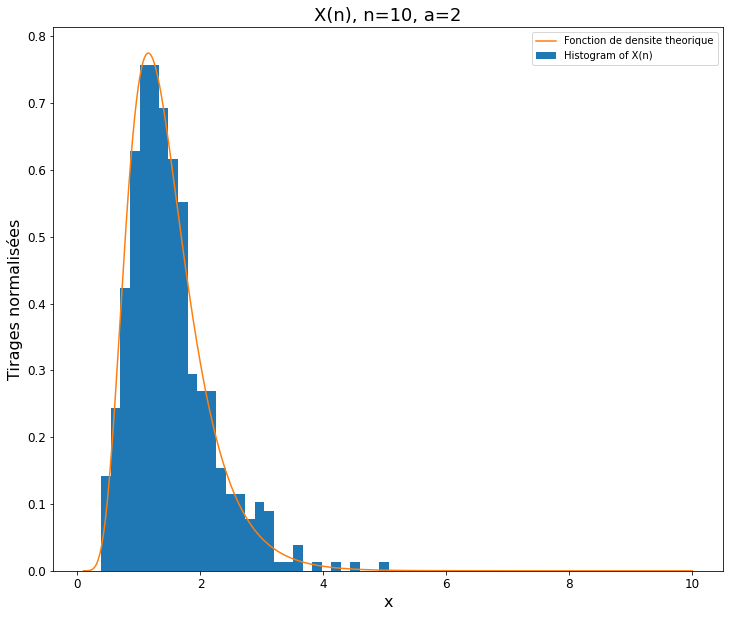

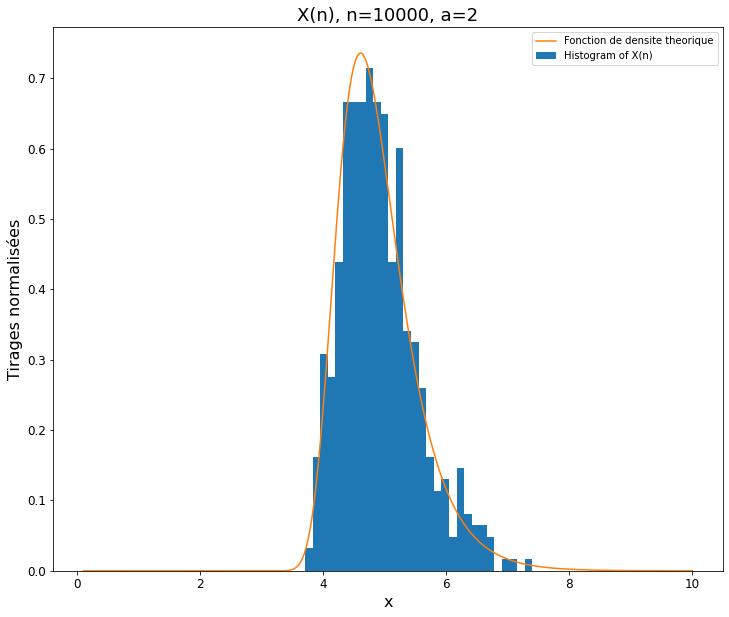

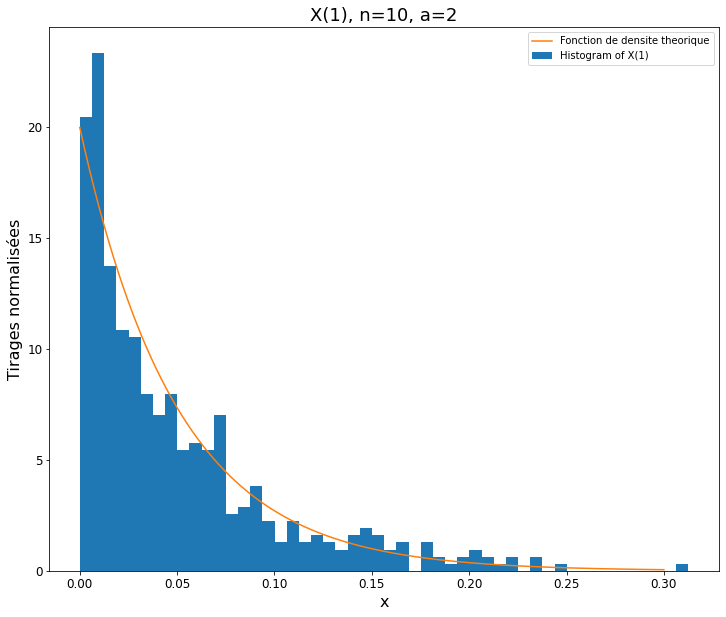

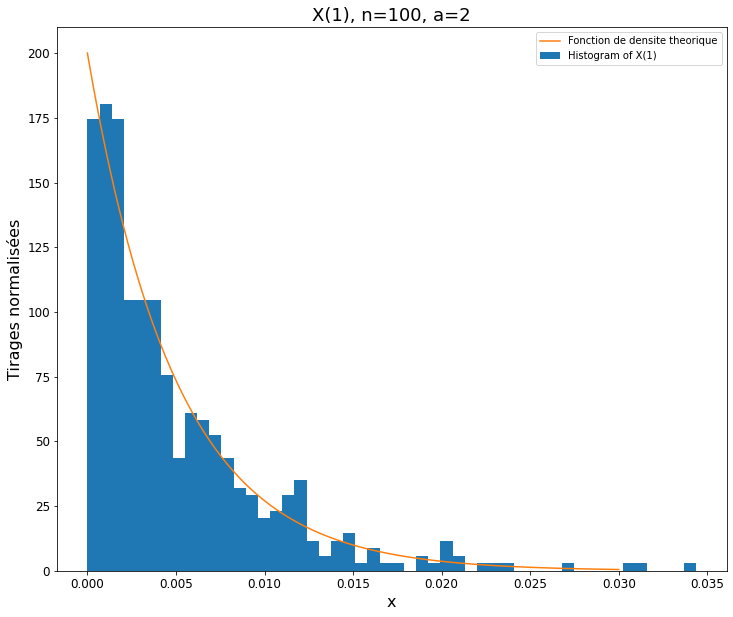

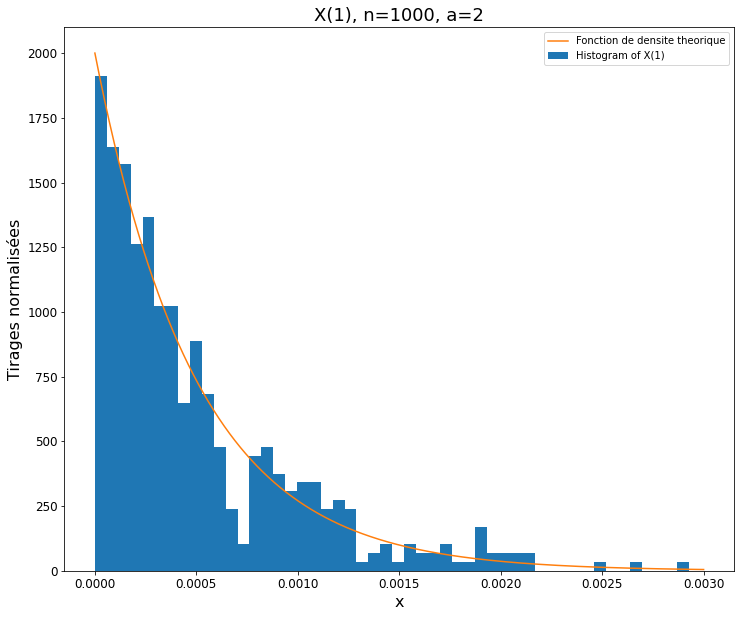

In [4]:
## Simulation de S1 :

# Parametres
a = 2

Rep = [10,10000]

for n in Rep:
    
    Tir = [VA_X_n(n,a) for i in range(500)]

    # Creating histogram
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(12,10)
    ax.hist(Tir,bins=30,density = 1,label = "Histogram of X(n)")
    ax.set_title("X(n), n="+str(n)+", a="+str(a), fontsize = 18)
    
    
    # Plot of density function
    d = np.linspace(0.1,10,10000)
    plt.plot(d,d_X_n(d,n,a),label = "Fonction de densite theorique")
    ax.legend()
    
    plt.ylabel("Tirages normalisées",fontsize = 16)
    plt.xlabel("x", fontsize = 16)
    
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)

    plt.show()
    
## Simulation de S2 :

Rep = [10,100,1000]

for n in Rep:
    
    Tir = [VA_X_1(n,a) for i in range(500)]

    # Creating histogram
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(12,10)
    ax.hist(Tir,bins=50,density = 1,label = "Histogram of X(1)")
    ax.set_title("X(1), n="+str(n)+", a="+str(a),fontsize = 18)
    
    # Plot of density function
    d = np.linspace(0,3/n,10000)
    plt.plot(d,d_X_1(d,n,a),label = "Fonction de densite theorique")
    ax.legend()
    
    plt.ylabel("Tirages normalisées",fontsize = 16)
    plt.xlabel("x", fontsize = 16)
    
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)

    plt.show()

#### Commentaires finaux

On remarque que toutes les histogrammes normalisés sont bien en accordance avec les courbes theoriques.

On observe aussi que les courbes tracées pour S1 nous indiquent que le plus $n$ est grand, plus la courbe sera déplacée à la droite. 

Pour les courbes tracées de S2, on remarque que notre fonction de densité tends à zero. C'est coherent avec le résultat theorique et est intuitif car il s'agit d'un minimum des tirages.

### Exercice T3

Pour cela on va calculer la fonction de partition du couple :

$$
F_{(X_{(1)},X_{(n)})}(x_{1},x_{n}) = \mathbb{P}[X_{(1)}\leq x_{1},X_{(n)}\leq x_{n}]
$$

On utilise que :

$$
\mathbb{P}[X_{(n)}\leq x_{n}] = \mathbb{P}[X_{(1)}>x_{1},X_{(n)}\leq x_{n}] + \mathbb{P}[X_{(1)} \leq x_{1},X_{(n)}\leq x_{n}] 
$$

$$
\mathbb{P}[X_{(1)} \leq x_{1},X_{(n)}\leq x_{n}] = \mathbb{P}[X_{(n)}\leq x_{n}] - \mathbb{P}[X_{(1)}>x_{1},X_{(n)}\leq x_{n}]   
$$

i) Pour $x_{1}\leq x_{n}$ :

Donc :

$$
F_{(X_{(1)},X_{(n)})}(x_{1},x_{n}) = \mathbb{P}[X_{(n)}\leq x_{n}] - \mathbb{P}[X_{(1)}>x_{1},X_{(n)}\leq x_{n}]   
$$

$$
F_{(X_{(1)},X_{(n)})}(x_{1},x_{n}) = \mathbb{P}[X_{1}\leq x_{n},\dots, X_{n}\leq x_{n}] - \mathbb{P}[X_{1} > x_{1},\dots, X_{n}\leq x_{1},X_{1}\leq x_{n},\dots,X_{n}\leq x_{n}]   
$$

$$
F_{(X_{(1)},X_{(n)})}(x_{1},x_{n}) = \mathbb{P}[X_{1}\leq x_{n},\dots, X_{n}\leq x_{n}] - \mathbb{P}[x_{1}<X_{1} \leq x_{n},\dots, x_{1}<X_{n} \leq x_{n}]   
$$

On utilise le faite que les fonctions sont i.i.d : 

$$
F_{(X_{(1)},X_{(n)})}(x_{1},x_{n}) = F(x_{n})^{n} - (F(x_{n})-F(x_{1}))^{n}
$$

On calcule la densité du couple :

$$
f_{(X_{(1)},X_{(n)})}(x_{1},x_{n})=\frac{\partial^{2} F}{\partial x_{1}\partial x_{n}}(x_{1},x_{n}) 
$$

Donc :

$$
\frac{\partial F}{\partial x_{n}} (x_{1},x_{n}) = n F(x_{n})^{n-1}f(x_{n}) - n (F(x_{n})-F(x_{1}))^{n-1} f(x_{n})
$$

$$
\frac{\partial^{2} F}{\partial x_{1} \partial x_{n}} (x_{1},x_{n})= -n(n-1) (F(x_{n})-F(x_{1}))^{n-2} f(x_{n}) (-f(x_{1}))
$$

$$
\frac{\partial^{2} F}{\partial x_{1} \partial x_{n}} (x_{1},x_{n})= n(n-1) (F(x_{n})-F(x_{1}))^{n-2} f(x_{1}) f(x_{n}) 
$$

ii) Pour $x_{1} > x_{n}$ :

On a que :

$$
\mathbb{P}[X_{(1)}>x_{1},X_{(n)}\leq x_{n}] = 0
$$

Donc :

$$
F_{(X_{(1)},X_{(n)})}(x_{1},x_{n}) = \mathbb{P}[X_{(n)}\leq x_{n}]   
$$

$$
F_{(X_{(1)},X_{(n)})}(x_{1},x_{n}) = F_{X_{(n)}}(x_{n}) 
$$

On calcule la densité du couple :

$$
f_{(X_{(1)},X_{(n)})}(x_{1},x_{n})=\frac{\partial^{2} F}{\partial x_{1}\partial x_{n}}(x_{1},x_{n}) = 0
$$

On conclut donc que :

$$
\boxed{f_{(X_{(1)},X_{(n)})}(x_{1},x_{n}) = n(n-1) (F(x_{n})-F(x_{1}))^{n-2} f(x_{1}) f(x_{n}) \mathbb{1}_{x_{1}\leq x_n}} 
$$

### Exercice T4

On va proceder par la méthode de la fonction muette. On prend $h: \mathbb{R}^{2}\rightarrow\mathbb{R}$ une fonction continue bornée. 

$$
\mathbb{E}[h(X_{(1)},V)] = \mathbb{E}[h(X_{(1)},X_{(n)}-X_{(1)})]
$$

Par le theoreme du transport :

$$
\mathbb{E}[h(X_{1},X_{(n)}-X_{1})]=\int_{\mathbb{R}}\int_{\mathbb{R}}h(x_{1},x_{n}-x_{1})f_{(X_{(1)},X_{(n)})}(x_{1},x_{n})dx_{1}dx_{n}
$$

On va procéder par un changement de variable $g:\mathbb{R}^{2}\rightarrow\mathbb{R}\times\mathbb{R}_{+}$ telle que $g(x_{1},x_{n}) = (x_{1},x_{n}-x_{1})$. On remarque que comme il y a l'indicatrice $\mathbb{1}_{x_{1}\leq x_{n}}$ on accepte que des termes positifs dans la deuxième coordonée. Il s'agit d'un changement de varible affine, cette fonction est donc de classe $\mathcal{C}^{1}$, bijective avec une inverse qui est elle aussi de classe $\mathcal{C}^{1}$. On a donc que $g^{-1}(x_{1},v) = (x_{1},x_{1}+v)$, donc :

$$
\text{Jac}(g^{-1})(x_{1},v) = 
\begin{bmatrix}
1 & 1 \\
0 & 1 
\end{bmatrix}
$$

Donc $|\text{det}(\text{Jac}(g^{-1})(x_{1},v))|=1$. On a donc que :

$$
\int_{\mathbb{R}}\int_{\mathbb{R}}h(x_{1},x_{n}-x_{1})f_{(X_{(1)},X_{(n)})}(x_{1},x_{n})dx_{1}dx_{n}=\int_{\mathbb{R}_{+}}\int_{\mathbb{R}}h(x_{1},v)f_{(X_{(1)},X_{(n)})}(x_{1},x_{1}+v)dx_{1}dv
$$

$$
\mathbb{E}[h(X_{(1)},V)] = \int_{\mathbb{R}_{+}}\int_{\mathbb{R}}h(x_{1},v)n(n-1) (F(x_{1}+v)-F(x_{1}))^{n-2} f(x_{1}) f(x_{1}+v)dx_{1}dv
$$

Par la méthode de la fonction muette on a trouvé donc que :

$$
f_{(X_{(1)},V)}(x_{1},v) = n(n-1) (F(x_{1}+v)-F(x_{1}))^{n-2} f(x_{1}) f(x_{1}+v)
$$

Pour trouver $f_{V}$ il suffit de trouver la loi marginale :

$$
f_{V}(v) = \int_{\mathbb{R}_{+}}f_{(X_{(1)},V)}(x_{1},v)dx_{1}
$$

On remplace la loi du couple :

$$
f_{V}(v) = \int_{\mathbb{R}} n(n-1) (F(x_{1}+v)-F(x_{1}))^{n-2} f(x_{1}) f(x_{1}+v)dx_{1}
$$

$$
\boxed{f_{V}(v) = n(n-1) \int_{\mathbb{R}_{+}} (F(x_{1}+v)-F(x_{1}))^{n-2} f(x_{1}) f(x_{1}+v)dx_{1}}
$$

Qui est exactement ce qu'on voulait prouver.


### Exercice T5

On définit $\forall i \in \{1,\dots,n\}$, $Y_{i}=\mathbb{1}_{X_{i} \leq y}$, on a donc que $Y_{i}=1$ si $X_{i} \leq y$ et $Y_{i}=0$ si $X_{i} > y$, or, comme $\mathbb{P}[Y_{i}=1] = \mathbb{P}[X_{i}\leq y]= F(y)$ et $\mathbb{P}[Y_{i}=0] = \mathbb{P}[X_{i} > y] = 1-\mathbb{P}[X_{i}\leq y] = 1 - F(y)$. On a donc que $Y_{i}$ est suit une loi de Bernoulli $\text{B}er(p)$ de paramètre $p=F(y)$. Comme nos $X_{i}$ sont i.i.d, on a que les $Y_{i}$ sont aussi i.i.d.

On définie $N_{y} = \sum_{i=1}^{n} Y_{i}$, cela sera donc une loi binomiale $B(n,p)$, donc :

$$
\mathbb{P}[N_{y}=k] = {n\choose k} (F(y))^{k}(1-F(y))^{n-k}
$$

On va maintenant calculer la fonction de partition de $X_{(k)}$. Pour cela on étudie l'événement $X_{(k)}\leq x$. Or, cela est équivalent à l'événement $N_{x} = \sum_{i=1}^{n}\mathbb{1}_{X_{i}\leq x} \geq k$, puisque $N_{x}$ represente le nombre de $X_{i}$ qui ont été inférieurs à $x$ et, s'il y a au moins $k$ qui ont été inférieurs, $X_{(k)}\leq x$. Donc :

$$
F_{X_{(k)}}(x) = \mathbb{P}[X_{(k)}\leq x] = \mathbb{P}[N_{x} \geq k] = \sum_{i=k}^{n} {n\choose i} (F(x))^{i}(1-F(x))^{n-i}
$$

Donc :

$$
\boxed{F_{X_{(k)}}(x) = \sum_{i=k}^{n} {n\choose i} (F(x))^{i}(1-F(x))^{n-i}}
$$

### Exercice T6



Nous avons que :

$$
 f_{X_{(k)}}(x) = F_{X_{(k)}}^{\prime}(x) =  \sum_{i=k}^{n} {n\choose i} (F(x))^{i}(1-F(x))^{n-i}
$$

$$
 f_{X_{(k)}}(x) = \sum_{i=k}^{n} {n\choose i} [i F(x)^{i-1} f(x)(1-F(x))^{n-i} - F(x)^{i} (n-i) (1-F(x))^{n-i-1} f(x)]
$$

$$
 f_{X_{(k)}}(x) = \sum_{i=k}^{n} {n\choose i} i F(x)^{i-1} f(x)(1-F(x))^{n-i} - \sum_{i=k}^{n} {n\choose i} F(x)^{i} (n-i) (1-F(x))^{n-i-1} f(x)
$$

Quand $i=n$ on a que $n-i=0$ :

$$
 f_{X_{(k)}}(x) = \sum_{i=k}^{n} {n\choose i} i F(x)^{i-1} f(x)(1-F(x))^{n-i} - \sum_{i=k}^{n-1} {n\choose i} F(x)^{i} (n-i) (1-F(x))^{n-i-1} f(x)
$$

On utilise que :

$$
i {n \choose i} = n {n-1 \choose i-1} \quad \text{and} \quad (n-i){n\choose i} = n{n-1 \choose i}
$$

Nous avons donc que :

$$
 f_{X_{(k)}}(x) = \sum_{i=k}^{n} n {n-1 \choose i-1} F(x)^{i-1} f(x)(1-F(x))^{n-i} - \sum_{i=k}^{n-1} n{n-1 \choose i} F(x)^{i} (1-F(x))^{n-i-1} f(x)
$$

$$
 f_{X_{(k)}}(x) = n \sum_{i=k}^{n} {n-1 \choose i-1} F(x)^{i-1} f(x)(1-F(x))^{n-i} - n \sum_{i=k}^{n-1} {n-1 \choose i} F(x)^{i} (1-F(x))^{n-i-1} f(x)
$$

$$
 f_{X_{(k)}}(x) = n \sum_{i=k-1}^{n-1} {n-1 \choose i} F(x)^{i} f(x)(1-F(x))^{n-i-1} - n \sum_{i=k}^{n-1} {n-1 \choose i} F(x)^{i} (1-F(x))^{n-i-1} f(x)
$$

$$
 f_{X_{(k)}}(x) = n {n-1 \choose k-1} F(x)^{k-1} f(x)(1-F(x))^{n-k}  + n \sum_{i=k}^{n-1} {n-1 \choose i} F(x)^{i} f(x)(1-F(x))^{n-i-1} - n \sum_{i=k}^{n-1} {n-1 \choose i} F(x)^{i} (1-F(x))^{n-i-1} f(x)
$$

$$
f_{X_{(k)}}(x) = n {n-1 \choose k-1} F(x)^{k-1} f(x)(1-F(x))^{n-k}
$$

$$
\boxed{f_{X_{(k)}}(x) = \frac{n!}{(k-1)! (n-k)!} F(x)^{k-1} (1-F(x))^{n-k} f(x) } 
$$

### Exercice S3

Cette fois on ne peut pas facilement procéder par la méthode d'inversion de la fonction de repartition, la densité n'est pas facilement intégrable. Nous allons donc simuler notre variable aleatoire par la méthode du rejet.

Pour faire cela on va borner notre densité par une variable aleatoire uniforme fois une constante, les deux à determiner. Pour les determiner, on tracera d'abord la densité de probabilité.

Pour la courbe theorique, remplaçons dans l'expression de la densité la fonction de partition et densité d'une expoentielle :

$$
F(x) = (1-e^{-\lambda x}) \quad f(x) = \lambda e^{-\lambda x}
$$

On a donc :

$$
f_{X_{(k)}}(x) = \frac{n!}{(k-1)! (n-k)!} (1-e^{-\lambda x})^{k-1} e^{-\lambda (n-k) x}  \lambda e^{-\lambda x}
$$

$$
\boxed{f_{X_{(k)}}(x) = \lambda \frac{n!}{(k-1)! (n-k)!} (1-e^{-\lambda x})^{k-1} e^{-\lambda (n-k+1) x} }
$$


In [5]:
## Fonction de densite

def d_X_k(x,k,n,a):
    
    factN = math.factorial(n)
    factKm1 = math.factorial(k-1)
    factNmK = math.factorial(n-k)
    
    Rat = factN/(factKm1*factNmK)
    
    return (a*Rat*(1-np.e**(-a*x))**(k-1)*np.e**(-a*(n-k+1)*x))

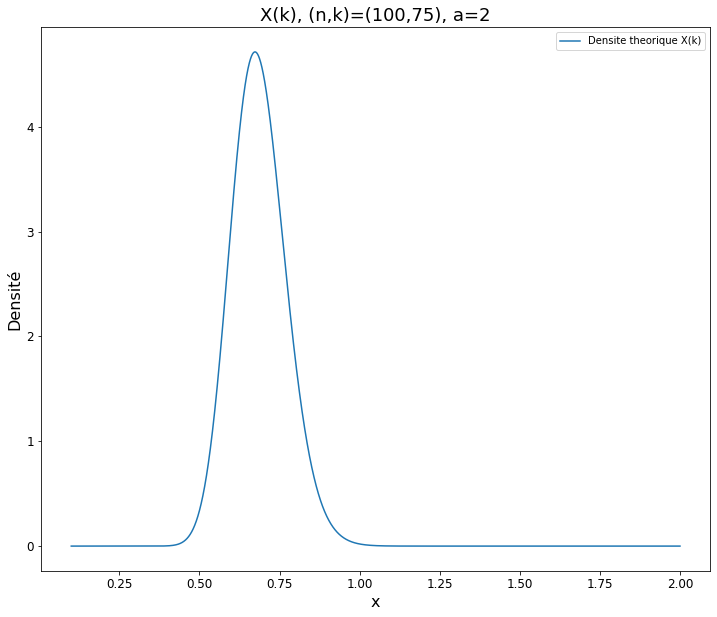

In [6]:
# Plot de la densité theorique

n = 100
k = 75

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,10)
d = np.linspace(0.1,2,10000)
plt.plot(d,d_X_k(d,k,n,2),label = "Densite theorique X(k)")
ax.set_title("X(k), (n,k)=("+str(n)+","+str(k)+"), a=2", fontsize = 18)
ax.legend()

plt.ylabel("Densité",fontsize = 16)
plt.xlabel("x", fontsize = 16)
    
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.show()

On remarque donc que cette densité est bornée par $c=5$, qui sera donc notre constante, et un intervale intéressant serait $[0.25,1.25]$ pour notre loi uniforme. Faisons donc la simulation de notre loi uniforme sur cet intervalle et la méthode du rejet.

In [7]:
#Variable aleatoire (methode du rejet)

def UnifAB(d,f):
    # Loi uniforme entre A et B
    return (d+(f-d)*random.random())

def VA_X_k(d,f,c,k,n,a):
    # d et f : [d,f] de notre uniforme qui fois c borne la densité
    # c c'est la constante pour borner la densité
    # (n,k,a) les parametres de notre variable aleatoire
    
    while True:
        Z = UnifAB(d,f)
        if random.random()*c*(1/(f-d))<d_X_k(Z,k,n,a):
            return Z

Faisons maintenant la simulation:

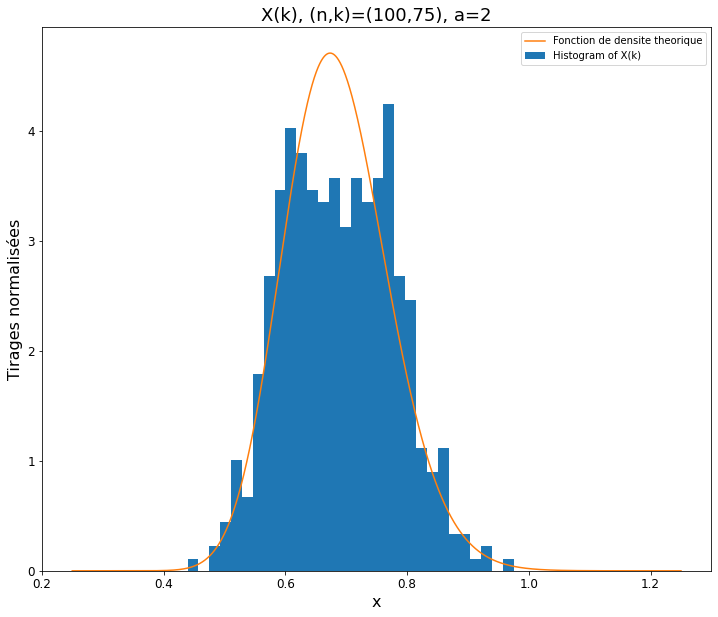

In [8]:
#Definition des parametres

k = 75
n = 100
N = 500
a = 2
c = 3
d = 0.25
f = 1.25

#Tirage

Tir = [VA_X_k(d,f,c,k,n,a) for i in range(N)]

# Creating histogram
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,10)
ax.hist(Tir,bins=30,density = 1,label = "Histogram of X(k)")
ax.set_title("X(k), (n,k)=("+str(n)+","+str(k)+"), a=2", fontsize = 18)
    
# Plot de la fonction de denité 
d = np.linspace(d,f,10000)
plt.plot(d,d_X_k(d,k,n,a),label = "Fonction de densite theorique")
ax.legend()

plt.ylabel("Tirages normalisées",fontsize = 16)
plt.xlabel("x", fontsize = 16)
    
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)


plt.show()


On procede par le même raisonement pour le $(k,n) = (100,10000)$ :

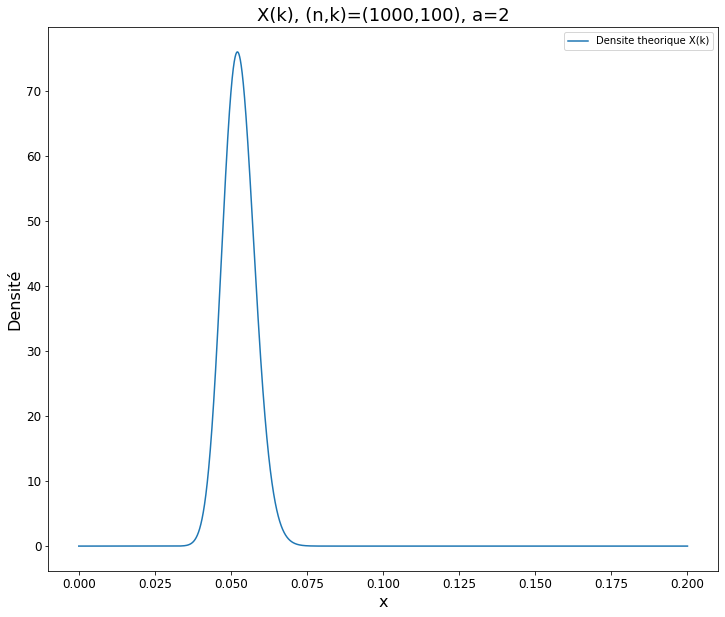

In [9]:
# Plot de la densité theorique

n = 1000
k = 100

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,10)
d = np.linspace(0,0.2,10000)
plt.plot(d,d_X_k(d,k,n,2),label = "Densite theorique X(k)")
ax.set_title("X(k), (n,k)=("+str(n)+","+str(k)+"), a=2", fontsize = 18)
ax.legend()

plt.ylabel("Densité",fontsize = 16)
plt.xlabel("x", fontsize = 16)
    
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.show()

On remarque donc que cette densité est bornée par $c=80$, qui sera donc notre constante, et un intervale intéressant serait $[0.025,0.08]$ pour notre loi uniforme. Faisons donc la simulation de notre loi uniforme sur cet intervalle et la méthode du rejet.

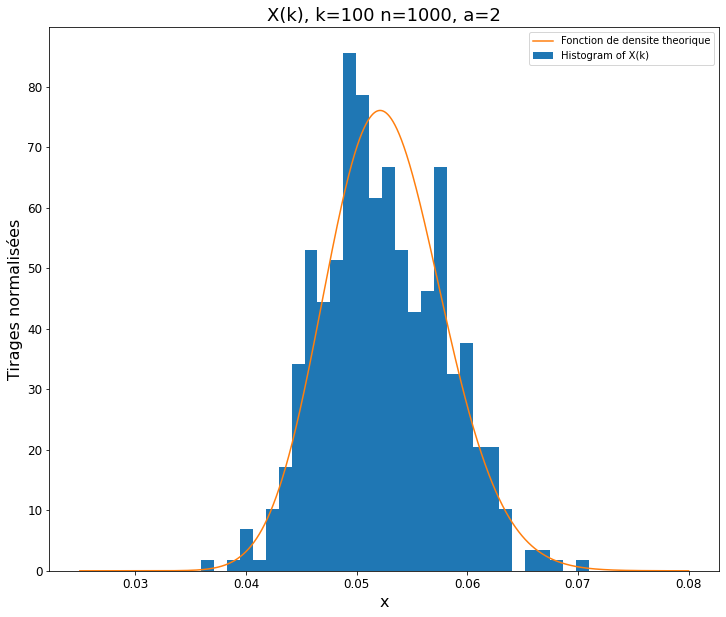

In [10]:
#Definition des parametres

k = 100
n = 1000
N = 500
a = 2
c = 80
d = 0.025
f = 0.08

#Tirage

Tir = [VA_X_k(d,f,c,k,n,a) for i in range(N)]

# Creating histogram
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,10)
ax.hist(Tir,bins=30,density = 1,label = "Histogram of X(k)")
ax.set_title("X(k), k="+str(k)+" n="+str(n)+", a="+str(a), fontsize = 18)

plt.ylabel("Tirages normalisées",fontsize = 16)
plt.xlabel("x", fontsize = 16)
    
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
    
# Plot de la fonction de denité 
d = np.linspace(d,f,10000)
plt.plot(d,d_X_k(d,k,n,a),label = "Fonction de densite theorique")
ax.legend()

plt.show()

De la même manière pour $(k,n)=(100,10000)$ :

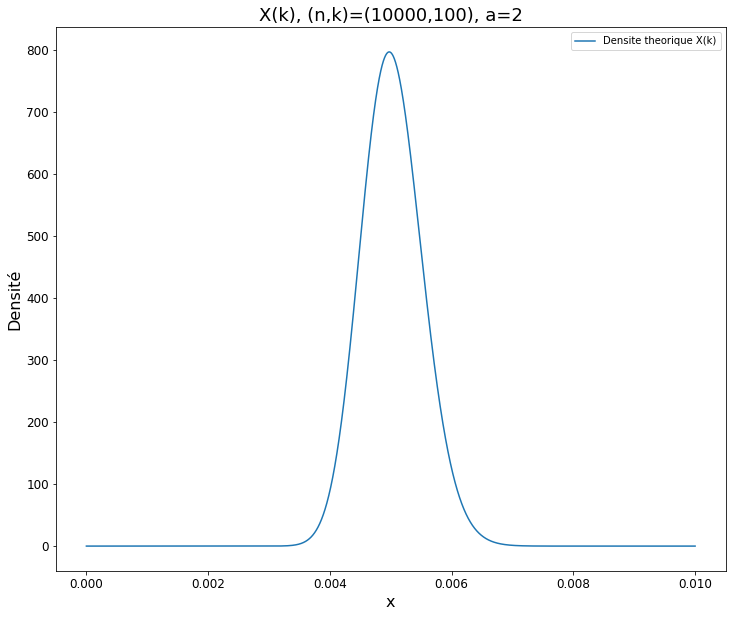

In [11]:
# Plot de la densité theorique

n = 10000
k = 100
a = 2

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,10)
d = np.linspace(0,0.01,10000)
plt.plot(d,d_X_k(d,k,n,a),label = "Densite theorique X(k)")
ax.set_title("X(k), (n,k)=("+str(n)+","+str(k)+"), a="+str(a),fontsize = 18)

plt.ylabel("Densité",fontsize = 16)
plt.xlabel("x", fontsize = 16)
    
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax.legend()

plt.show()

On remarque donc que cette densité est bornée par $c=850$, qui sera donc notre constante, et un intervale intéressant serait $[0.003,0.008]$ pour notre loi uniforme. Cependant on remarque que le temps de computation augmente énormement. Cela a lieu car la machine passe beaucoup de temps pour calculer les facotoriels des nombres extrement grands.

Pour reduire le temps de calcul et pour éviter des problèmes de StackOverflow dus a des nombres très grands dans le factoriel, au lieu de calculer $n!$ et $(n-k)!$ separement, calculons directement $\frac{n!}{(n-k)!} = n(n-1)\dots (n-k+1)$

In [12]:
## Fonction de densite

def FacNK(n,k):
    toRet=1
    while(n>k):
        toRet = n * toRet
        n = n-1
    return toRet

def d_X_k_2(x,k,n,a):
    
    factNK = FacNK(n,n-k) 
    factKm1 = math.factorial(k-1)
    
    Rat = factNK/(factKm1)
    
    return (a*Rat*(1-np.e**(-a*x))**(k-1)*np.e**(-a*(n-k+1)*x))

def VA_X_k_2(d,f,c,k,n,a):
    # d et f : [d,f] de notre uniforme qui fois c borne la densité
    # c c'est la constante pour borner la densité
    # (n,k,a) les parametres de notre variable aleatoire
    
    while True:
        Z = UnifAB(d,f)
        if random.random()*c*(1/(f-d))<d_X_k_2(Z,k,n,a):
            return Z

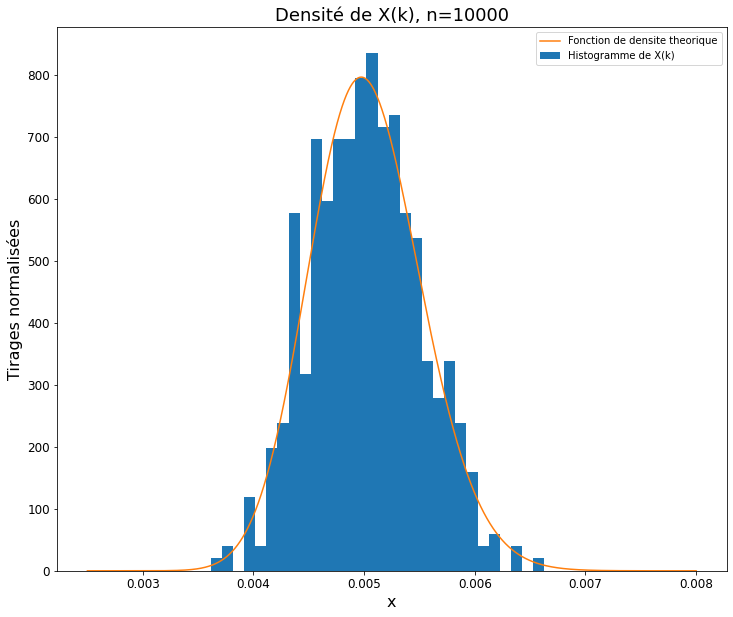

In [13]:
#Definition des parametres

k = 100
n = 10000
N = 500
a = 2
c = 80
d = 0.0025
f = 0.008

#Tirage

Tir = [VA_X_k_2(d,f,c,k,n,a) for i in range(N)]

# Creating histogram
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,10)
ax.hist(Tir,bins=30,density = 1,label = "Histogramme de X(k)")
ax.set_title("X(1), n="+str(n)+", a=2")

ax.set_title("Densité de X(k), n="+str(n),fontsize = 18)
ax.ticklabel_format(useOffset=False)
    
plt.ylabel("Tirages normalisées",fontsize = 16)
plt.xlabel("x", fontsize = 16)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
    
# Plot de la fonction de denité 
d = np.linspace(d,f,10000)
plt.plot(d,d_X_k_2(d,k,n,a),label = "Fonction de densite theorique")
ax.legend()

plt.show()

On observe que cette optimisation peut être aussi utilisée pour tracer les courbes precedentes.

#### Commentaires finaux

On remarque que toutes les histogrammes normalisés sont bien en accordance avec les courbes theoriques. En plus, pour tracer ces courbes on a du realiser plus efficacement les calculs de nos fonctions pour éviter des StackOverflow et de temps de calcul trop longs, cela a été detaillée au cours de notre résolution.

On observe aussi que pour $k$ fixée, quand on augmente $n$ notre courbe se deplace vers zero, avec une forme qui ressamble à une gaussienne. 

On remarque aussi que la valeur du $x$ du sommet des histogrammes semblent être proportionel à $10^{-n}$. Quand on multiplie $n$ par $10$, la valeur de la de cet $x$ est divisé par 10.



### Exercice T7

Si E(X) existe, alors:
$$\int_{R} |xf(x)|dx<\infty$$
dès lors:
$$\forall n\in\mathbb{N} 
\int_{R} |nxf(x)|dx<\infty$$
or, on sait que 
$$\forall x\in\mathbb{R} ,
0\leq F(x)\leq1$$
Donc, par critère de convergence dominée: $$|nxf(x)F(x)^{n-1})|\leq |nxf(x)| \Rightarrow \int_{R} |nxf(x)F(x)^{n-1}|dx<\infty$$
Ce qui signifie que $X_{(n)}$ admet une espérance.
Enfin,similairement $$\forall k\in\{1,\dots,n\};
 f_{X_{(k)}}(x)\leq k {n\choose k} f(x) $$
et donc de manière analogue au premier cas  $\forall k\in\{1,\dots,n\};X_{(k)}$ admet une espérance.

## Partie 2

### Exercice S4

On peut s'attendre à ce que $\hat\theta_{1}$ soit un bon estimateur car si on a un jeu des données $(x_{1},\dots,x_{n})$, issus chacun d'une loi uniforme $\mathscr{U}([0,\theta])$ indépendants, on sait que $\forall i\in \{1,\dots,n \}$, $x_{i}\leq \theta$. En plus, le plus grand c'est $\theta$, le moins probable c'est d'avoir les valeurs mésurés de $(x_{1},\dots,x_{n})$, donc pour maximiser leur probabilité on prend le plus petit $\theta $ possible en prenant compte que $\forall i\in \{1,\dots,n \}$, $x_{i}\leq \theta$. Or, c'est exatement $\hat\theta_{1} = \max_{i\in\{1,\dots,n\}}X_{i}=X_{(n)}$.

Dans ce raisonement on reflaichit de la même manière que le maximum de vraissamblance. On essaie de trouver le $\theta$ qui maximise l'observation des données observés. 

Ecrivons maintenant la fonction qui calcule le $\hat\theta_{1}$ :

In [14]:
### Estimateur theta 1

def EstTheta1(n,theta):
    # n : nombre de tirages
    # theta : parametre de la loi uniforme
    # return : le max des n tirages
    
    ma = 0
    
    for i in range(n):
        tir = theta*random.random()
        if tir > ma:
            ma = tir
    
    return ma
        

Pour la courbe theorique on utilise le résultat trouvé dans la Partie I : 

$$
f_{X_{(n)}}(x) = n F(x)^{n-1}f(x)
$$

Donc :

$$
f_{X_{(n)}}(x) = n \frac{x^{n-1}}{\theta^{n}} \mathbb{1}_{x\in[0,\theta]}
$$

Ecrivons la fonction theorique :

In [15]:
def d_X_n_Unif(n,theta,x):
    #if x >=0 and x<= theta:
    return n*(1/theta)*(x/theta)**(n-1)
    #else:
    #    return 0

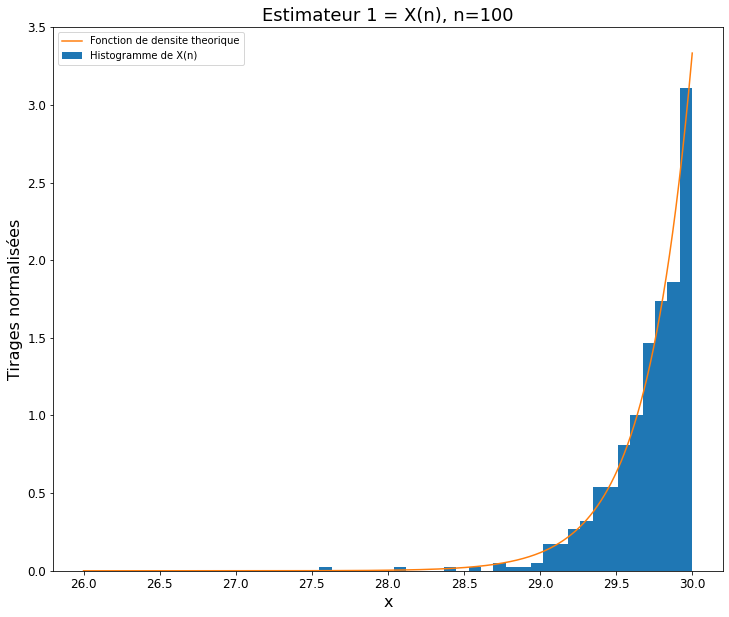

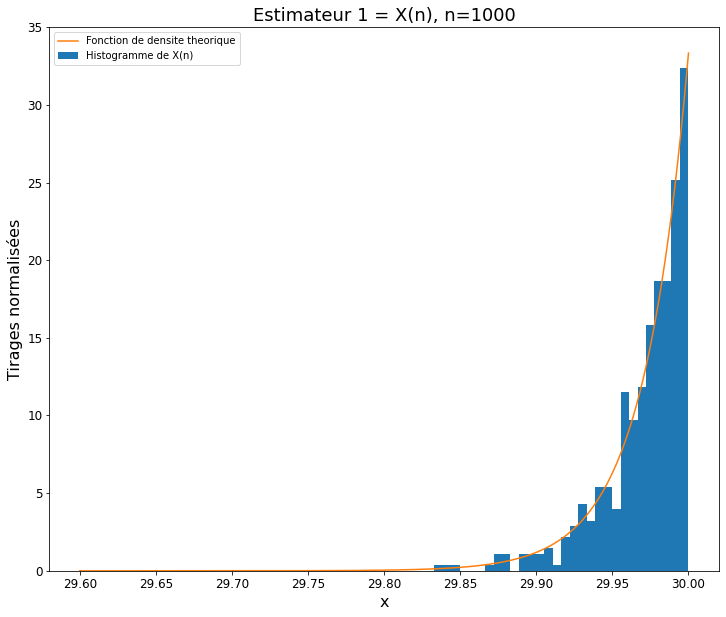

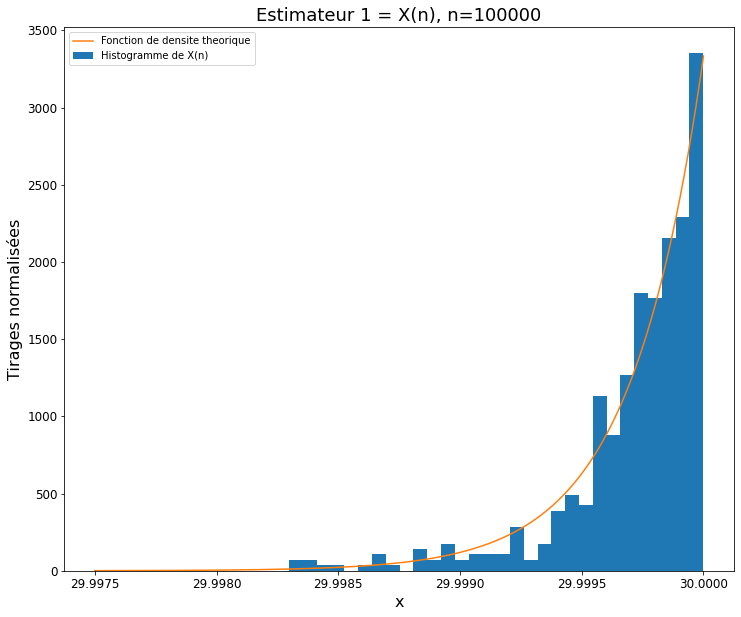

In [16]:
# Parametres

theta = 30
Table_n = [100,1000,100000]
N = 500

for n in Table_n:
    
    #Tir = [theta*random.random() for i in range(N)]
    Tir = [EstTheta1(n,theta) for i in range(N)]

    # Creating histogram
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(12,10)
    ax.hist(Tir,bins=30,density = 1,label = "Histogramme de X(n)")
    ax.set_title("Estimateur 1 = X(n), n="+str(n),fontsize = 18)
    ax.ticklabel_format(useOffset=False)
    
    plt.ylabel("Tirages normalisées",fontsize = 16)
    plt.xlabel("x", fontsize = 16)
    
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)
    
    
    # Plot of density function
    
    if n == 100 :
        d = np.linspace(26,theta,10000)
        plt.plot(d,d_X_n_Unif(n,theta,d),label = "Fonction de densite theorique")
    elif n == 1000 :
        d = np.linspace(29.6,theta,10000)
        plt.plot(d,d_X_n_Unif(n,theta,d),label = "Fonction de densite theorique")
    elif n == 100000 :
        d = np.linspace(29.9975,theta,10000)
        plt.plot(d,d_X_n_Unif(n,theta,d),label = "Fonction de densite theorique")
    
    ax.legend()

    plt.show()
    

#### Commentaires finaux :

On remarque effectivement que notre histogramme, quand normalisé, correspond à la courbe theorique attendue.

En plus, comme attendue, on remarque que l'écart des tirages et le $\theta$ théorique dans l'axe $x$ réduit quand $n$ croit. On voit aussi que notre densité, et aussi l'histogramme attainnent des valleurs plus grands, c'est qui est attendue theoriquement. 

On remarque aussi que tous les tirages sont en dessous de $\theta$, c'est qui est attendu car ils sont tirés d'une loi uniforme de paramètre $\theta$. On peut s'attendre avec cela un biais de notre estimateur, il est probablement plus petit que le paramètre qu'on souhaite estimé pour chaque $n$, même si quand $n$ croit il tend au parametre.

### Exercice S5

Or, on peut s'attendre à ce que notre estimateur $\hat\theta_{1}$ soit biaisé. Comme nos tirages seront toujours plus petites que le parametre qu'on veut estimer, on s'attend à ce qu'il y ait un bias $\hat\theta_{1}<\theta$. Pour trouver le facteur on doit proceder par le calcul de la espérance de notre estimateur à $n$ tirages.

Ecrivons maintenant la fonction :

In [17]:
def EstTheta2(n,theta):
    # n : nombre de tirages
    # theta : parametre de la loi uniforme
    # return : le max des n tirages fois (n+1)/n
    
    return EstTheta1(n,theta)*((n+1)/n)

Pour calculer la fonction de densité de $\hat\theta_{2}$ :

$$
F_{\hat\theta_{2}}(x) = \mathbb{P}\Bigg[\frac{n+1}{n}X_{(n)}\leq x\Bigg]
$$

$$
F_{\hat\theta_{2}}(x) = \mathbb{P}\Bigg[X_{(n)}\leq\frac{n}{n+1} x\Bigg]
$$

$$
F_{\hat\theta_{2}}(x) = F_{X_{(n)}}\Big(\frac{n}{n+1} x\Big) = \Big(F\Big(\frac{n}{n+1}x\Big)\Big)^{n}
$$

$$
F_{\hat\theta_{2}}(x) = F_{X_{(n)}}\Big(\frac{n}{n+1} x\Big) = \Big(\frac{n}{n+1}x\frac{1}{\theta}\Big)^{n}
$$

Donc :

$$
\boxed{f_{\hat\theta_{2}}(x) = n x^{n-1}\frac{1}{\theta^{n}} \Big(\frac{n}{n+1}\Big)^{n} \mathbb{1}_{x\in [0,\theta \frac{n+1}{n}]}}
$$

In [18]:
# Fonction de densité :

def d_X_n_Unif2(n,theta,x):
    
    a = n*x
    b = (n+1)*theta
    
    return n * (1/x) * (a/b)**n  

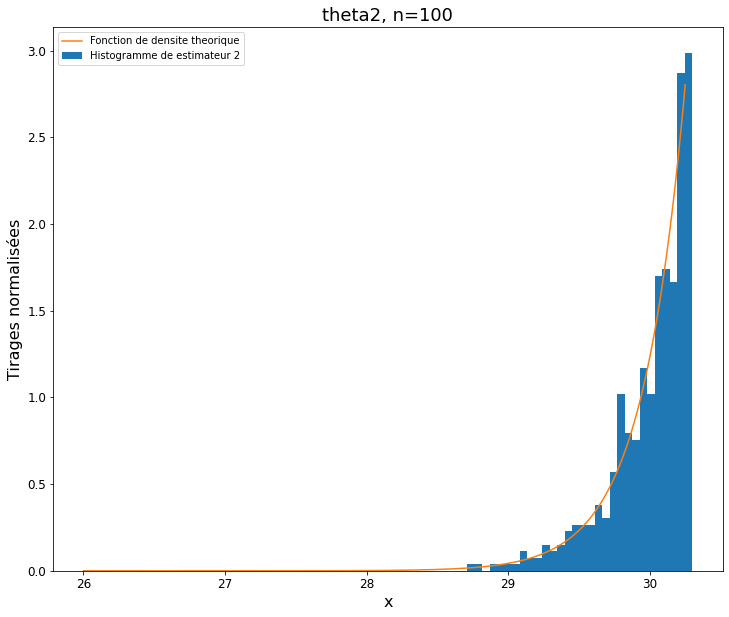

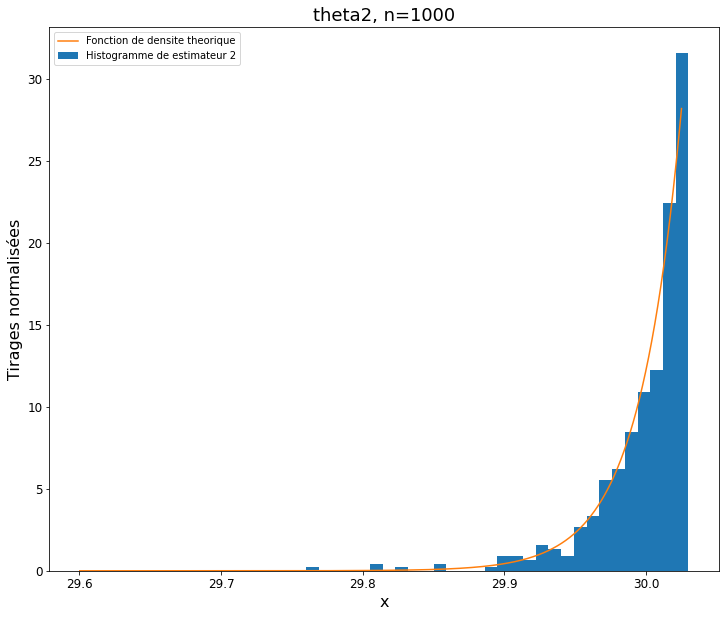

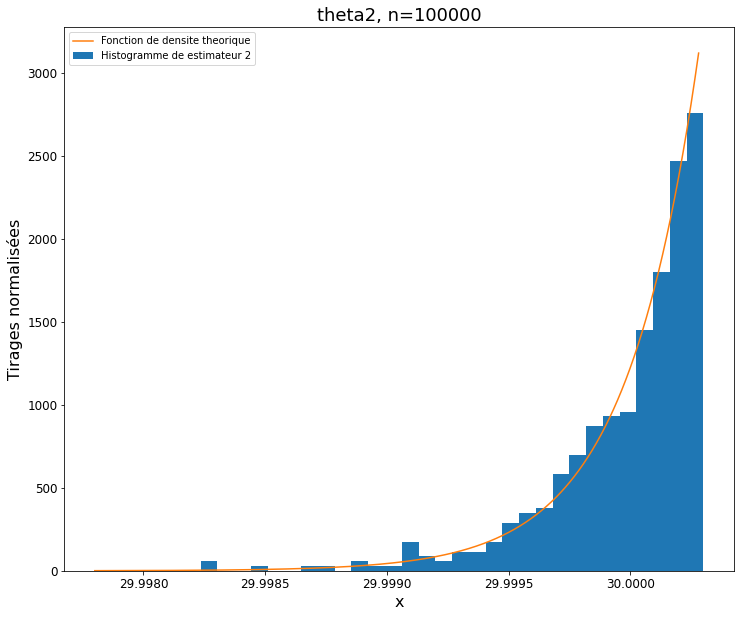

In [19]:
# Parametres

theta = 30
Table_n = [100,1000,100000]
N = 500
alpha = ((n+1)/n)

for n in Table_n:
    
    Tir = [EstTheta2(n,theta) for i in range(N)]

    # Creating histogram
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(12,10)
    ax.hist(Tir,bins=30,density = 1,label = "Histogramme de estimateur 2")
    ax.set_title("theta2, n="+str(n),fontsize = 18)
    ax.ticklabel_format(useOffset=False)
    
    plt.ylabel("Tirages normalisées",fontsize = 16)
    plt.xlabel("x", fontsize = 16)
    
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)
    
    
    # Plot of density function
    
    if n == 100 :
        d = np.linspace(26*alpha,theta+0.25,10000)
        plt.plot(d,d_X_n_Unif2(n,theta,d),label = "Fonction de densite theorique")
    elif n == 1000 :
        d = np.linspace(29.6*alpha,theta+0.025,10000)
        plt.plot(d,d_X_n_Unif2(n,theta,d),label = "Fonction de densite theorique")
    elif n == 100000 :
        d = np.linspace(29.9975*alpha,theta+0.00028,10000)
        plt.plot(d,d_X_n_Unif2(n,theta,d),label = "Fonction de densite theorique")
    
    ax.legend()

    plt.show()

#### Commentaires finaux :

On remarque effectivement que notre histogramme, quand normalisé, correspond à la courbe theorique attendue.

En plus, comme attendue, on remarque que l'écart des tirages et le $\theta$ théorique dans l'axe $x$ réduit quand $n$ croit. On voit aussi que notre densité, et aussi l'histogramme attainnent des valleurs plus grands, c'est qui est attendue theoriquement.

Cette fois on remarque que notre tirage atteint des valeurs en dessus du paramètre $\theta$.

### Exercice S6

Faisons les tirages de $(\theta - X_{(n)})-X_{(1)}$ pour une loi uniforme $\mathscr{U}([0,\theta])$ :

In [20]:
def DeltaX(n,theta):
    # n : nombre de tirages
    # theta : parametre de la loi uniforme
    
    ma = 0
    mi = theta
    
    for i in range(n):
        tir = theta*random.random()
        if tir > ma:
            ma = tir
        if tir < mi:
            mi = tir
    
    return (theta - ma) - mi

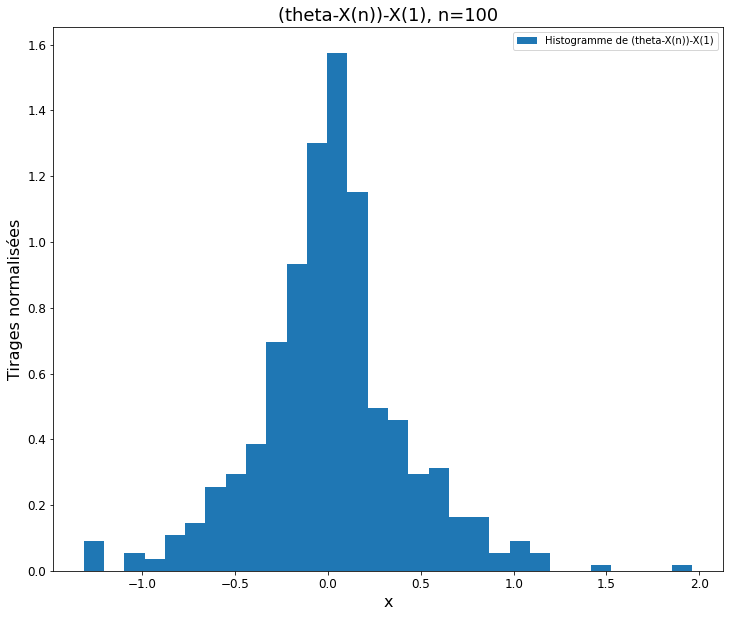

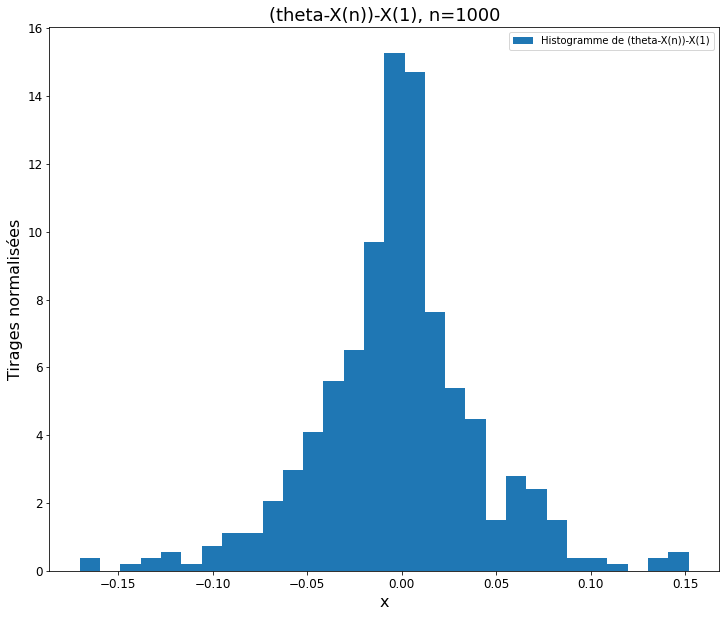

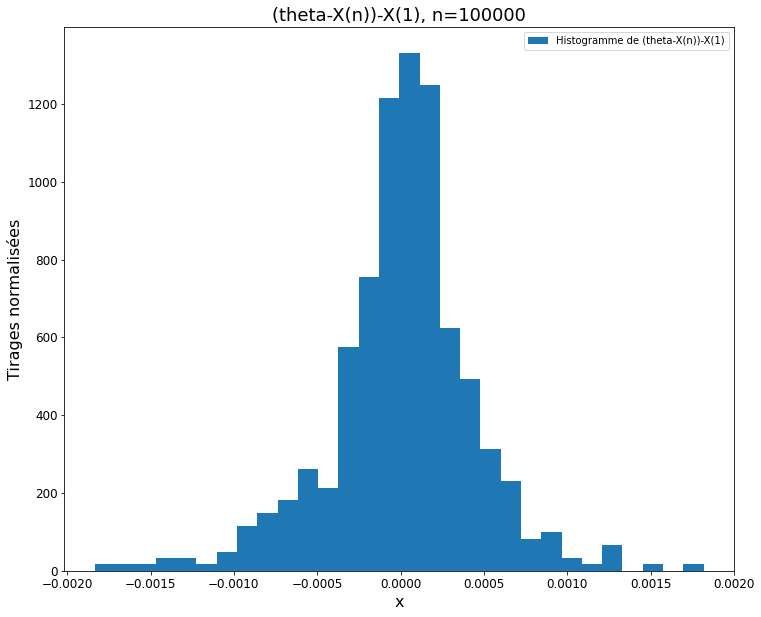

In [21]:
# Parametres

theta = 30
Table_n = [100,1000,100000]
N = 500

for n in Table_n:
    
    Tir = [DeltaX(n,theta) for i in range(N)]

    # Creating histogram
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(12,10)
    ax.hist(Tir,bins=30,density = 1,label = "Histogramme de (theta-X(n))-X(1)")
    ax.set_title("(theta-X(n))-X(1), n="+str(n), fontsize = 18)
    ax.ticklabel_format(useOffset=False)
    
    plt.ylabel("Tirages normalisées",fontsize = 16)
    plt.xlabel("x", fontsize = 16)
    
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)
    
    ax.legend()

    plt.show()

D'abord on remarque que la distance qui sépare $X_{(n)}$ et $\theta$ est $\theta - X_{(n)}$ et donc la distance entre cela et la distance entre $X_{(1)}$ et zéro est :

$$
\Delta = \theta - X_{(n)} -X_{(1)}
$$

$$
\Delta = \theta - (X_{(n)} + X_{(1)})
$$

On voit dans les coubes tracées que cette distance est centrée en zero et que l'erreur tend à zero quand $n$ croit. Or, cela veut dire que $\hat\theta_{3} = X_{(n)} + X_{(1)}$ est probablement un bon estimateur pour $\theta$.

Ecrivons maintenant l'estimateur $\hat\theta_{3}$:

In [22]:
def EstTheta3(n,theta):
    # n : nombre de tirages
    # theta : parametre de la loi uniforme
    # return : le max des n tirages
    
    ma = 0
    mi = theta
    
    for i in range(n):
        tir = theta*random.random()
        if tir > ma:
            ma = tir
        if tir < mi:
            mi = tir
    
    return ma + mi

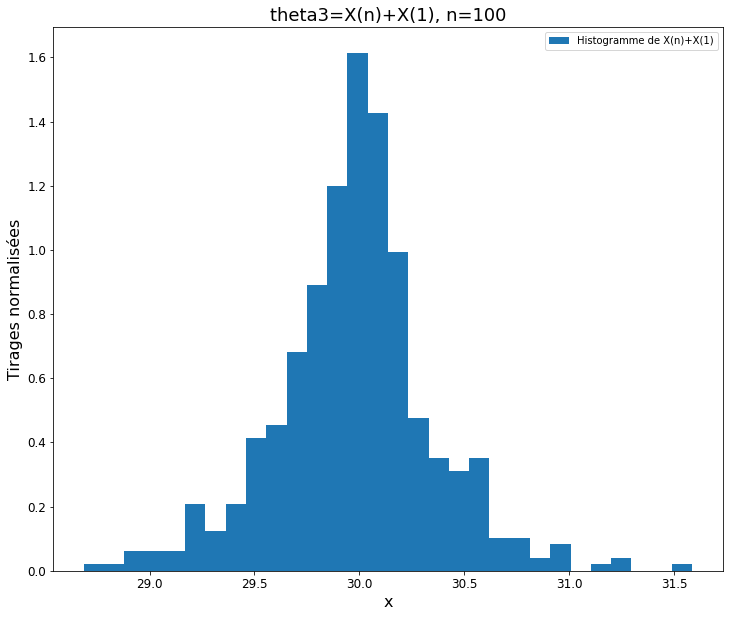

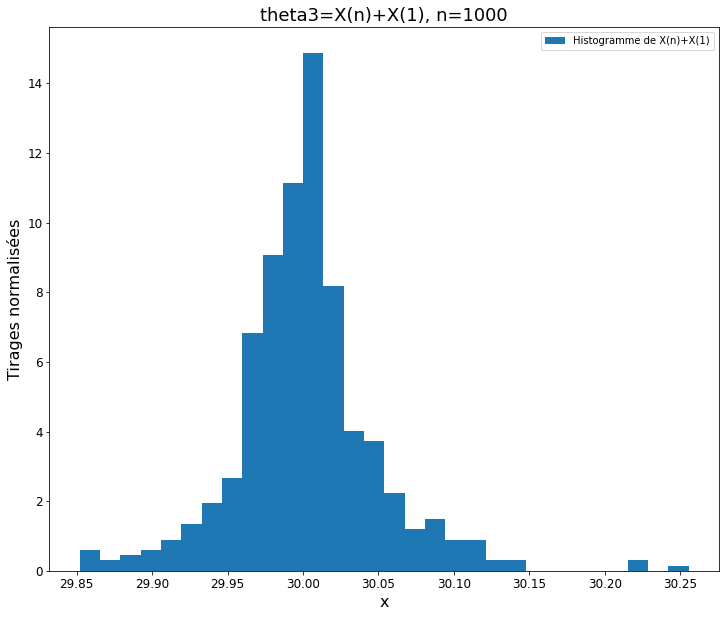

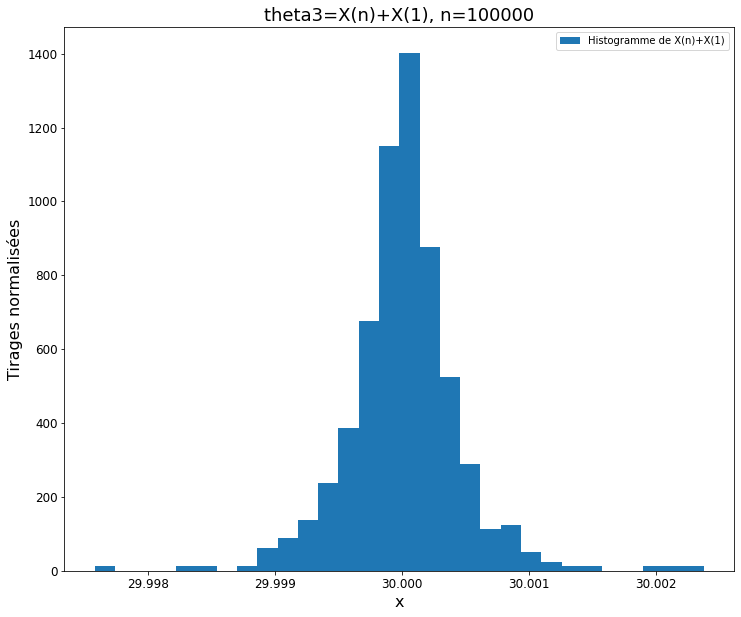

In [23]:
# Parametres

theta = 30
Table_n = [100,1000,100000]
N = 500

for n in Table_n:
    
    Tir = [EstTheta3(n,theta) for i in range(N)]

    # Creating histogram
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(12,10)
    ax.hist(Tir,bins=30,density = 1,label = "Histogramme de X(n)+X(1)")
    ax.set_title("theta3=X(n)+X(1), n="+str(n),fontsize = 18)
    ax.ticklabel_format(useOffset=False)
    
    plt.ylabel("Tirages normalisées",fontsize = 16)
    plt.xlabel("x", fontsize = 16)
    
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)
    
    ax.legend()

    plt.show()

#### Commentaires finaux

On remarque qu'effectivement notre courbe est centrée en $\theta = 30$ et semble convergir aussi vite que les deux dernières courbes quand $n$ croit. Cela peut être remarqué par l'écart dans l'axe $x$ de notre courbe qui est du même ordre grandeur que dans les cas précedants.

### Exercice S7

Quand nous avons une loi uniforme $X \sim \mathscr{U}[0,\theta]$ on a que $\mathbb{E}[X] = \frac{\theta}{2}$.

Quand on prend la moyenne des tirages, par la loi forte de grands nombres on aura une convergence forte vers l'esperence de $X$ :

$$
\bar{X} = \frac{X_{1}+\dots+X_{n}}{n}\rightarrow \frac{\theta}{2}
$$

Donc c'est intuitif que $\hat\theta_{4} = 2 \bar X$ ce soit un bon estimateur. Ce résultat peut être démontré par la méthode des moments. 

Pour valider notre intuition, regardons si la moyenne des tirages est centrée en $\theta/2$, et si quand $n$ croit l'écart diminue.

In [24]:
def Moyenne(n,theta):
    # n : nombre de tirages
    # theta : parametre de la loi uniforme
    # return : la moyenne des n tirages
    
    s = 0
    
    for i in range(n):
        s += theta*random.random()
        
    return (s/n)

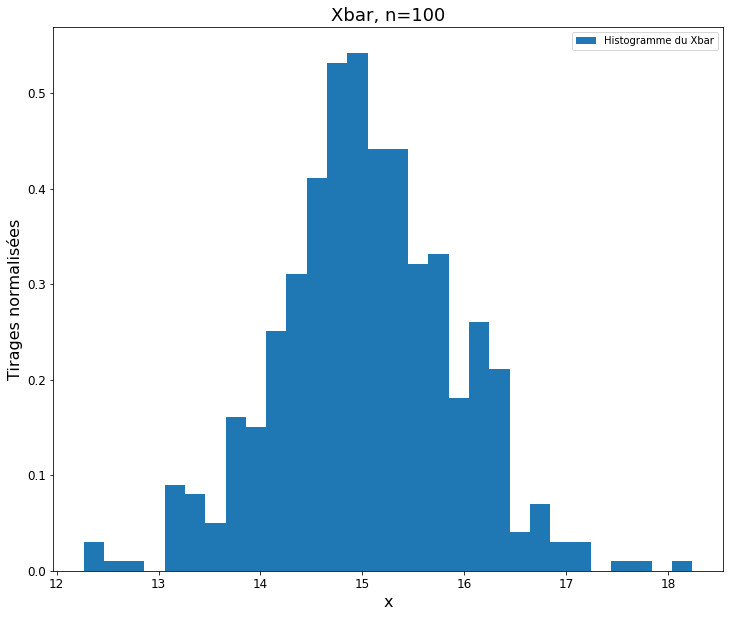

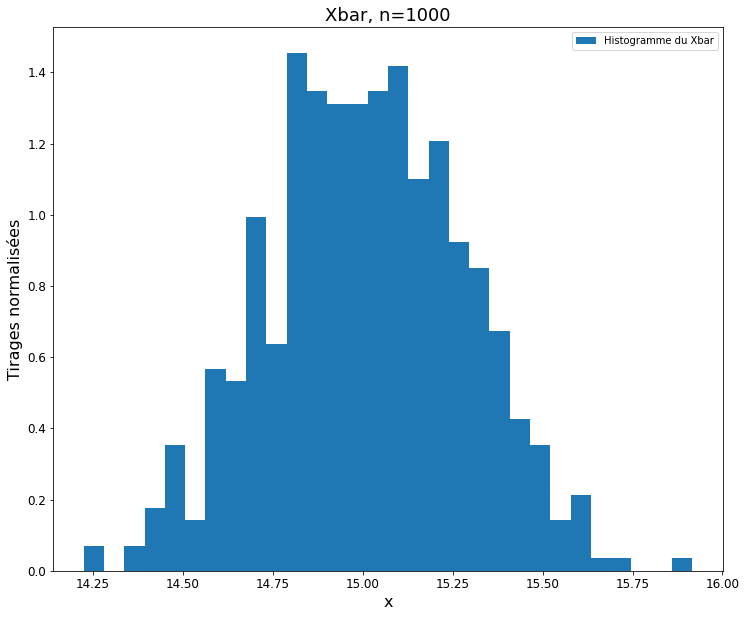

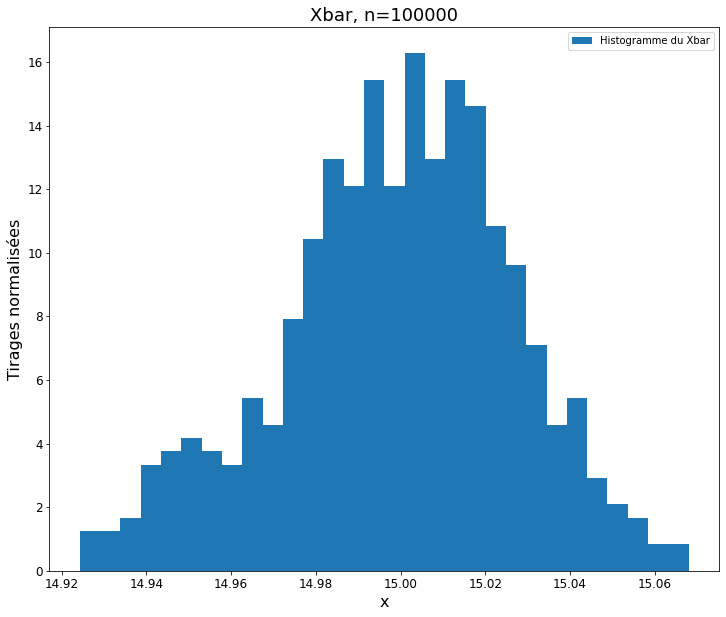

In [25]:
# Parametres

theta = 30
Table_n = [100,1000,100000]
N = 500

for n in Table_n:
    
    Tir = [Moyenne(n,theta) for i in range(N)]

    # Creating histogram
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(12,10)
    ax.hist(Tir,bins=30,density = 1,label = "Histogramme du Xbar")
    ax.set_title("Xbar, n="+str(n),fontsize = 18)
    ax.ticklabel_format(useOffset=False)
    
    plt.ylabel("Tirages normalisées",fontsize = 16)
    plt.xlabel("x", fontsize = 16)
    
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)
    
    ax.legend()

    plt.show()

Effectivement c'est centrée à la moitié de notre $\theta = 30$, et l'écart des tirages diminue, c'est qui valide notre intution. Passons maintenant au tracé de l'estimateur $\hat\theta_{4}$.

In [26]:
def EstTheta4(n,theta):
    # n : nombre de tirages
    # theta : parametre de la loi uniforme
    # return : la moyenne des n tirages
    
    s = 0
    
    for i in range(n):
        s += theta*random.random()
        
    return 2*(s/n)

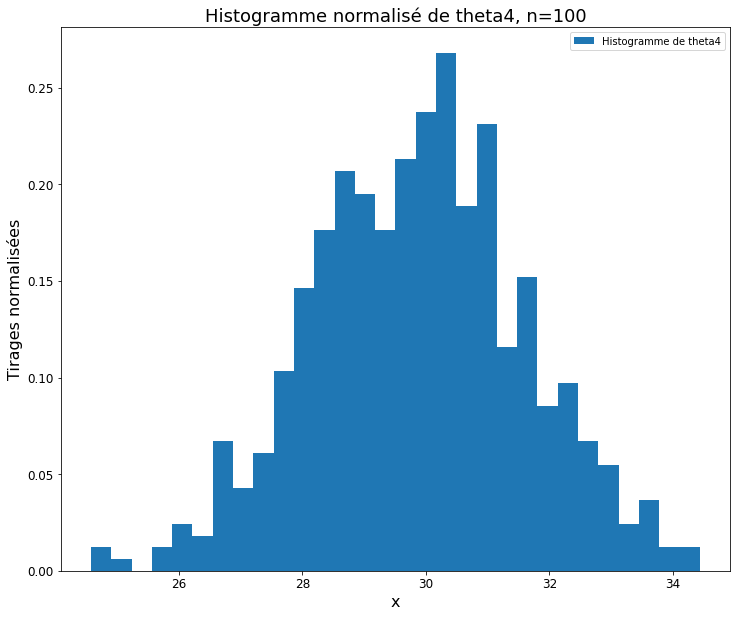

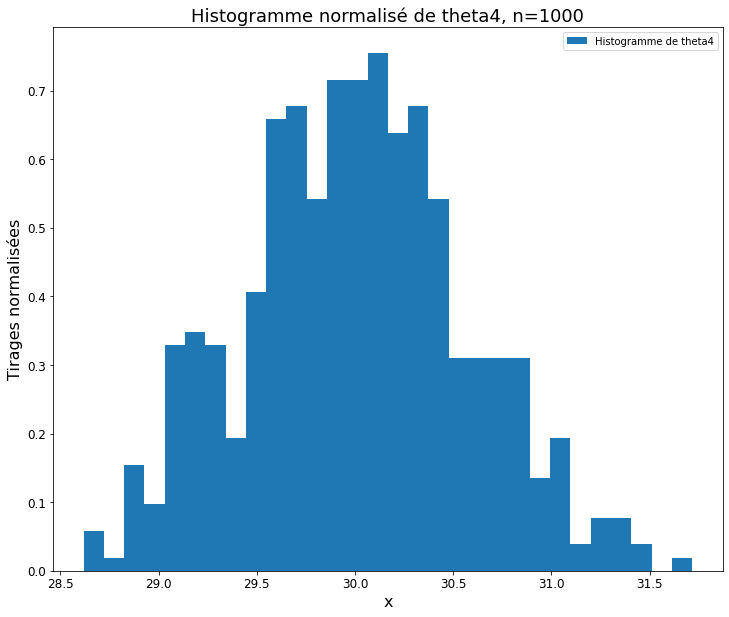

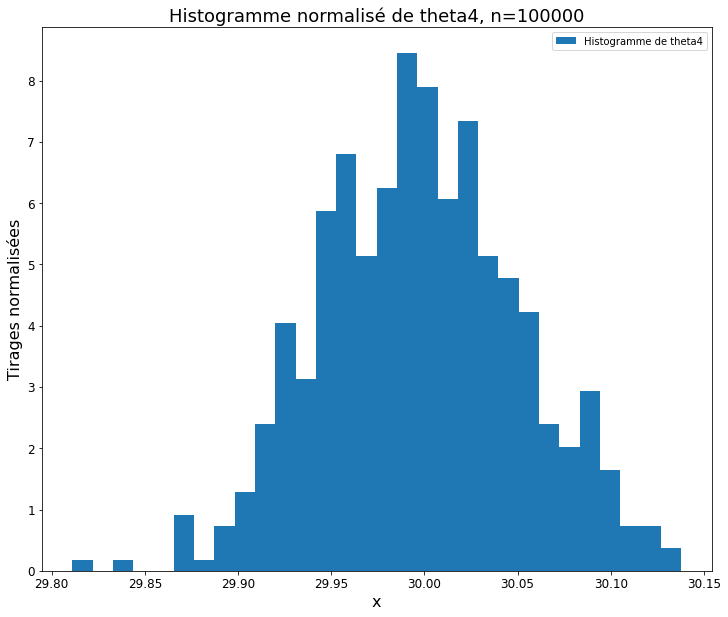

In [27]:
# Parametres

theta = 30
Table_n = [100,1000,100000]
N = 500

for n in Table_n:
    
    Tir = [EstTheta4(n,theta) for i in range(N)]

    # Creating histogram
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(12,10)
    ax.hist(Tir,bins=30,density = 1,label = "Histogramme de theta4")
    ax.set_title("Histogramme normalisé de theta4, n="+str(n),fontsize = 18)
    ax.ticklabel_format(useOffset=False)
    
    plt.ylabel("Tirages normalisées",fontsize = 16)
    plt.xlabel("x", fontsize = 16)
    
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)
    
    ax.legend()

    plt.show()

#### Commentaires finaux :

On remarque qu'effectivement notre estimateur converge au paramètre theorique. Les courbes sont centrées et l'écart diminue. Par contre, on observe que l'écart dans l'axe $x$ est plus grand quand on compare avec les autres estimateurs. Cela probablement indique que cet estimateur a un moins bon ordre de converge du risque quadratique moyen.

### Exercice T9

Estimateur $\theta _1$ :

Pour tout $ \epsilon > 0 $ on a:

$$
\mathbb{P}[| \hat{\theta}_{1} - \theta | \geq \epsilon] = \mathbb{P}[ \theta - \hat{\theta}_{1}  \geq \epsilon] =  \mathbb{P}[ \hat{\theta}_{1}  \leq \theta - \epsilon] 
$$

Remarquons que, utilisons le résultat de la partie I :

$$
\mathbb{P}[ \hat{\theta}_{1}  \leq \theta - \epsilon] = \mathbb{P}[ X_{(n)}  \leq \theta - \epsilon] = F_{X_{(n)}}(\theta - \epsilon) = F(\theta - \epsilon)^{n}
$$

Où $F$ est la fonction de répartition d'une loi uniforme $\mathscr{U}([0,\theta])$, donc :

$$
\mathbb{P}[ \hat{\theta}_{1}  \leq \theta - \epsilon] = \Big( \frac{\theta -\epsilon}{\theta} \Big)^{n}
$$

Or, comme $\epsilon$ est strictement positif, nous avons que :

$$
\lim_{n\Rightarrow +\infty}\mathbb{P}[ \hat{\theta}_{1}  \leq \theta - \epsilon] = \lim_{n\Rightarrow +\infty}\Big( \frac{\theta -\epsilon}{\theta} \Big)^{n} = 0
$$

Et nous avons donc que $\theta_{1}$ converge en probabilité vers $\theta$.

De plus, on constate que :

$$
\sum_{n=1}^{+\infty} \mathbb{P}[ \hat{\theta}_{1}  \leq \theta - \epsilon]  = \Big( \frac{\theta -\epsilon}{\theta} \Big)^{n} 
$$

correspond à une série géométrique raison inférieure à 1 donc convergente. Ainsi par le théorème de Borel-Cantelli, il en ressort que $\theta _1 $ converge aussi presque sûrement vers $\theta $.

Nous avons donc convergence forte pour l'estimateur 1.

Estimateur $\theta _2$:

On sait que $\frac{n}{n+1} \rightarrow 1$, de plus, on a trouvé que $\theta _1 \rightarrow\theta$ presque sûrement Ainsi $\theta _2 \rightarrow \theta$ presque sûrement.

Estimateur $\theta _4$:

On constate que, en utilisant à nouveau les résultats de la partie I appliquée à une loi uniforme $\mathscr{U}([0,\theta])$, pour tout  $\epsilon>0$, on a:

$$
P(X_\textrm{(1)}\geq\epsilon ) = 1 - P(X_\textrm{(1)}<\epsilon ) = (1-F(\epsilon))^{n} = \Big(\frac{\theta-\epsilon }{\theta}\Big)^n 
$$

Qui converge vers 0. De plus :

$$\sum_{n=1}^{\infty}\Big(\frac{\theta-\epsilon}{\theta}\Big)^ n$$ 

est une série convergente. 
Ainsi, par le même argument pour l'estimateur 1, nous avons que $X_\textrm{(1)} \rightarrow 0 $ presque sûrement. 

Dès lors $\hat{\theta}_{4} = X_\textrm{(n)}+X_\textrm{(1)} \rightarrow \theta$ presque sûrement.


Estimateur $\theta _3$:
Les variables $X_i$ définissant un échantillon de variable aléatoires iid indépendantes, de même loi et de carré intégrables, par la loi forte des grands nombres on a:
$\bar{X} \rightarrow \theta /2$ presque sûrement et donc $\hat{\theta}_3 \rightarrow\theta$  presque sûrement.

### Exercice S8

In [28]:
theta = 30
nMax = 100

TableN = [i for i in range(1,nMax+1)]

TableE1 = []
TableE2 = []
TableE3 = []
TableE4 = []

Xmin = theta

E1 = 0
E2 = E1
E3 = (Xmin+E1)/2
E4 = 0

for n in range(1,nMax+1):
    
    Tir = theta*random.random()
    
    ##Update de E1:
    if Tir>E1 :
        E1 = Tir
    
    ##Update de E2
    E2 = E1 * ((n+1)/n)
    
    ##Update de E3
    if(Tir<Xmin):
        Xmin = Tir
        
    E3 = Xmin + E1
    
    #Update de E4
    if n==1:
        E4 = Tir
    if n!=1:
        E4 = 2*(((n-1)*(E4/2)+Tir)/n)
        
    TableE1.append(E1)
    TableE2.append(E2)
    TableE3.append(E3)
    TableE4.append(E4)

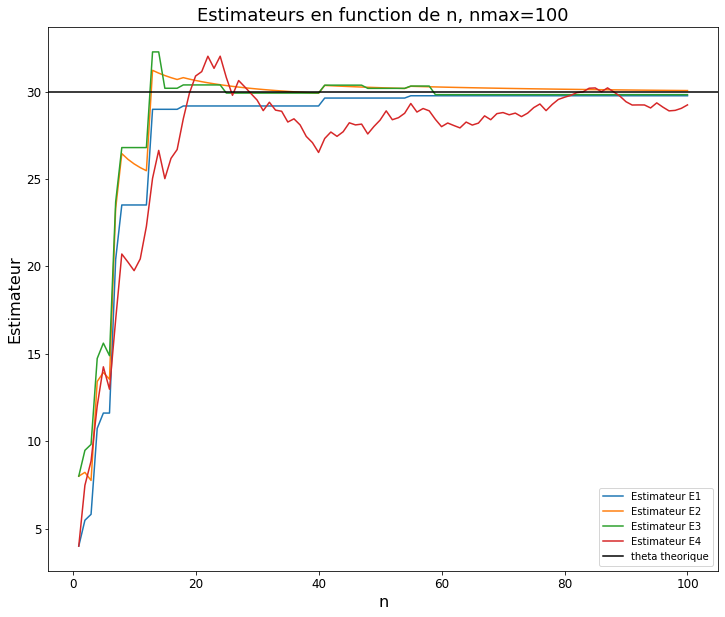

In [29]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,10)

ax.set_title("Estimateurs en function de n, nmax="+str(nMax),fontsize = 18)

plt.plot(TableN,TableE1,label = "Estimateur E1")
plt.plot(TableN,TableE2,label = "Estimateur E2")
plt.plot(TableN,TableE3,label = "Estimateur E3")
plt.plot(TableN,TableE4,label = "Estimateur E4")

plt.ylabel("Estimateur",fontsize = 16)
plt.xlabel("n", fontsize = 16)
    
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.axhline(30, color = "black", label = "theta theorique")


plt.legend()

plt.show()

Effectivement on voit toutes les courbe convergir à $\theta = 30$.

In [30]:
theta = 30
nMax = 10000

TableN = [i for i in range(1,nMax+1)]

TableE1 = []
TableE2 = []
TableE3 = []
TableE4 = []

Xmin = theta

E1 = 0
E2 = E1
E3 = (Xmin+E1)/2
E4 = 0

for n in range(1,nMax+1):
    
    Tir = theta*random.random()
    
    ##Update de E1:
    if Tir>E1 :
        E1 = Tir
    
    ##Update de E2
    E2 = E1 * ((n+1)/n)
    
    ##Update de E3
    if(Tir<Xmin):
        Xmin = Tir
        
    E3 = Xmin + E1
    
    #Update de E4
    if n==1:
        E4 = Tir
    if n!=1:
        E4 = 2*(((n-1)*(E4/2)+Tir)/n)
        
    TableE1.append(E1)
    TableE2.append(E2)
    TableE3.append(E3)
    TableE4.append(E4)

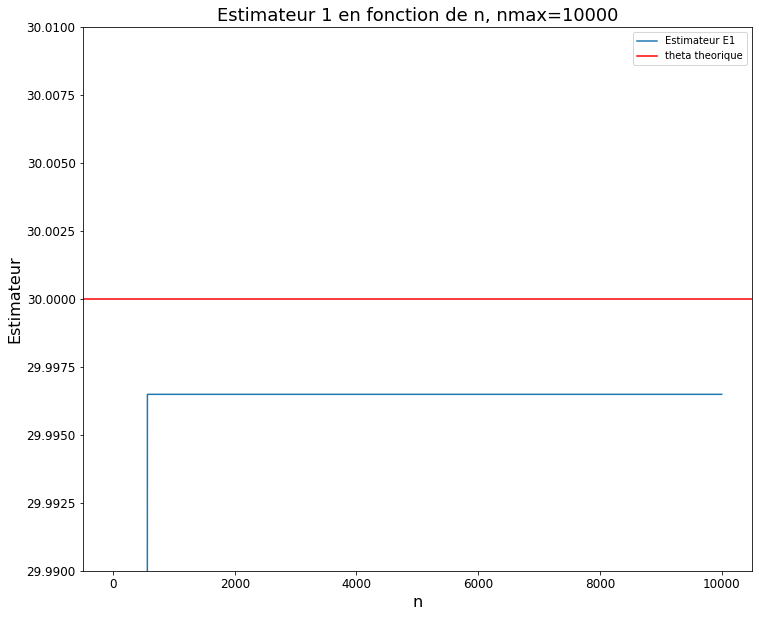

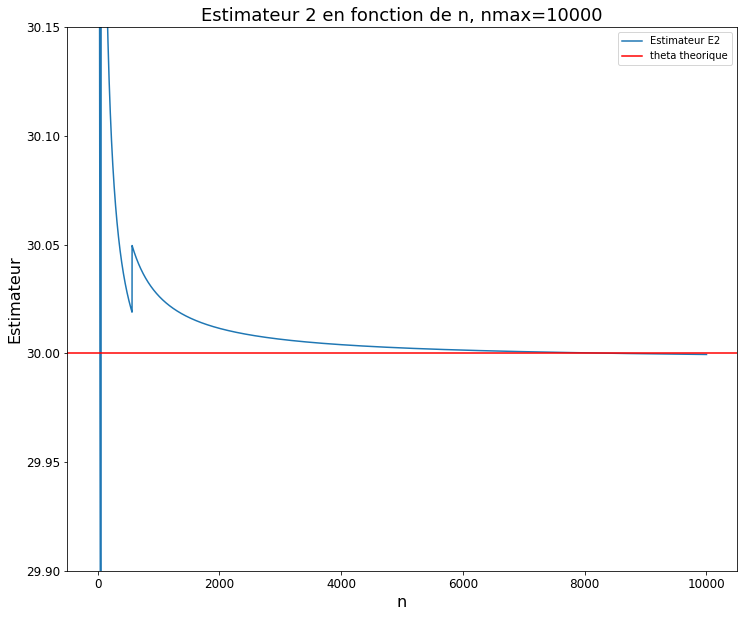

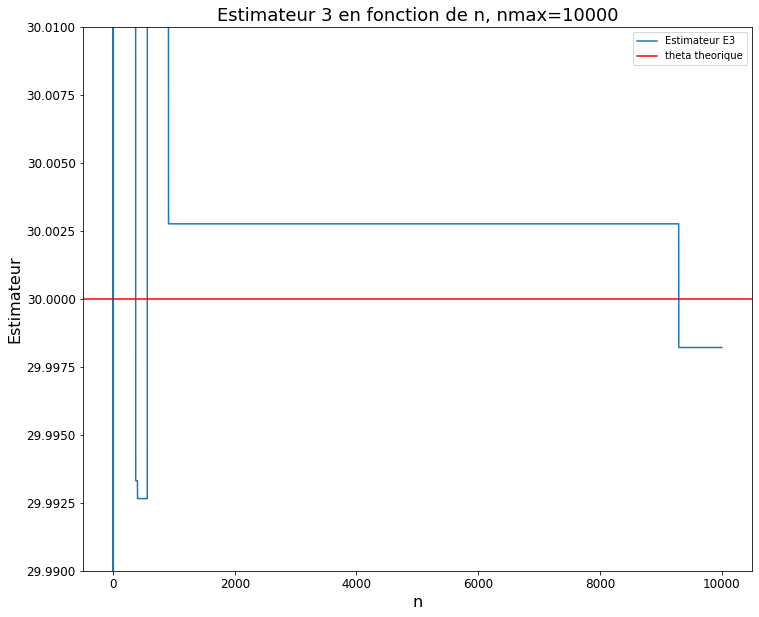

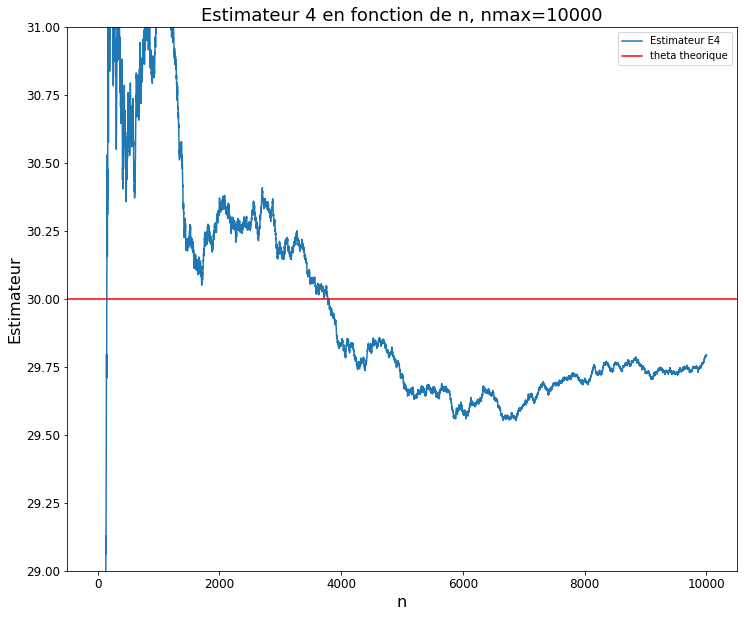

In [31]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,10)
ax.set_title("Estimateur 1 en fonction de n, nmax="+str(nMax), fontsize = 18)

plt.ylabel("Estimateur",fontsize = 16)
plt.xlabel("n", fontsize = 16)
    
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.plot(TableN,TableE1,label = "Estimateur E1")
plt.axhline(30, color = "red", label = "theta theorique")

ax.set_ylim(29.99, 30.01)
ax.ticklabel_format(useOffset=False)

plt.legend()

plt.show()

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,10)
ax.set_title("Estimateur 2 en fonction de n, nmax="+str(nMax),fontsize = 18)

plt.ylabel("Estimateur",fontsize = 16)
plt.xlabel("n", fontsize = 16)
    
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.plot(TableN,TableE2,label = "Estimateur E2")
plt.axhline(30, color = "red", label = "theta theorique")

ax.set_ylim(29.9, 30.15)
ax.ticklabel_format(useOffset=False)

plt.legend()

plt.show()

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,10)
ax.set_title("Estimateur 3 en fonction de n, nmax="+str(nMax),fontsize=18)

plt.ylabel("Estimateur",fontsize = 16)
plt.xlabel("n", fontsize = 16)
    
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.plot(TableN,TableE3,label = "Estimateur E3")
plt.axhline(30, color = "red", label = "theta theorique")

ax.set_ylim(29.99, 30.01)
ax.ticklabel_format(useOffset=False)

plt.legend()

plt.show()

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,10)
ax.set_title("Estimateur 4 en fonction de n, nmax="+str(nMax),fontsize = 18)

plt.ylabel("Estimateur",fontsize = 16)
plt.xlabel("n", fontsize = 16)
    
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax.set_ylim(29, 31)
ax.ticklabel_format(useOffset=False)

plt.plot(TableN,TableE4,label = "Estimateur E4")
plt.axhline(30, color = "red", label = "theta theorique")

plt.legend()

plt.show()

#### Commentaires finaux :

On remarque que pour le premier tracée que toutes les courbes convergent pour la valeur de $\theta = 30$. On remarque aussi que l'estimateur 4 est celui qui converge le plus lentement.

Quand on regarde les courbes de chaque estimateur et on ajuste les axes pour voir les détails, on remarque que effectivement celle de l'estimateur 4 a une convergence plus lente que les autres quand $n$ croit (l'écart de l'axe $y$ est plus grand dans le tracée de l'estimateur 4). 

### Exercice T10

En utilisant les résultats de la partie 1 :

$$
\mathbb{E}(\hat\theta_1)=\int_{0}^{\theta} nxf(x)F(x)^{n-1} dx
$$

avec $f(x)=\frac{1}{\theta}$ et $F(x)=\frac{x}{\theta}$ on trouve donc par le calcul

$$
\mathbb{E}(\hat\theta_1)=n\int_{0}^{\theta} x\frac{1}{\theta}\Big(\frac{x}{\theta}\Big)^{n-1} dx
$$

$$
\mathbb{E}(\hat\theta_1)=\frac{n}{\theta^{n}}\int_{0}^{\theta} x^{n} dx
$$

$$
\boxed{\mathbb{E}(\hat\theta_1)=\frac{n}{n+1}\theta}
$$

Ainsi 

$$
\boxed{\mathbb{E}(\hat\theta_2)=\mathbb{E}\Big(\frac{n+1}{n}\theta_1\Big)=\theta}
$$

Par suite

$$
\mathbb{E} = 2 \times \mathbb{E}\Big(\frac{1}{n}\sum_{i=1}^{n}X_{i}\Big)
$$

Comme nos variables sont iid et par la linearité de l'esperence:

$$
\mathbb{E}(\hat\theta_4)=\frac{2}{n} \times \sum_{i=1}^{n} \mathbb{E}(X_{1}) 
$$

$$
\boxed{\mathbb{E}(\hat\theta_4)=\frac{2}{n} n \frac{\theta}{2} = \theta}
$$

Et enfin 

$$
\mathbb{E}(\hat\theta _3)=\mathbb{E}(X_{(1)})+\mathbb{E}(X_{(n)})
$$

En utilisant les résultats de la partie I :  

$$
\mathbb{E}(X_{(1)}) = \int_{0}^{\theta} nxf(x)(1-F(x))^{n-1}dx =\theta-\frac{n}{n+1}\theta
$$

donc

$$
\boxed{\mathbb{E}(\hat\theta_3)=\mathbb{E}(X_{(1)})+\mathbb{E}(X_{(n)})=\theta}
$$

### Exercice T11

En developant, on obtient 

$$
R(\theta,\hat{\theta})=\theta^2-2\theta\mathbb{E}(\hat{\theta})+\mathbb{E}(\hat{\theta}^2)
$$

$$
R(\theta,\hat{\theta})=Var(\hat{\theta})+\theta^2-2\theta\mathbb{E}(\hat{\theta})+\mathbb{E}(\hat{\theta})^2
$$

$$
\boxed{R(\theta,\hat{\theta})=Var(\hat{\theta})+(\theta- \mathbb{E}(\hat{\theta}))^2}
$$

Et donc $b^{2} (\theta,\hat\theta) = (\theta- \mathbb{E}(\hat{\theta}))^2$.


### Exercice T12

Commençons par l'estimateur $\hat\theta_{1}$. Pour résoudre cela on appliquera la formule obtenue en T11 :

$$
R(\theta,\hat\theta_{1}) = \text{Var}_{\theta}(\hat\theta_{1}) + (\mathbb{E}_{\theta}[\hat\theta_{1}]-\theta)^{2}
$$

Comme montré en T11 on a que :

$$
\mathbb{E}_{\theta}[\hat\theta_{1}] = \frac{n}{n+1}\theta
$$

Donc :

$$
\mathbb{E}_{\theta}[\hat\theta_{1}] - \theta = \frac{n}{n+1}\theta - \theta = \frac{-1}{(n+1)}\theta
$$

Calculons la variance :

$$
\text{Var}_{\theta}(\hat\theta_{1}) = \mathbb{E}_{\theta}[\hat\theta_{1}^{2}] - \mathbb{E}_{\theta}[\hat\theta_{1}]^{2}
$$

$$
\text{Var}_{\theta}(\hat\theta_{1}) = \mathbb{E}_{\theta}[\hat\theta_{1}^{2}] - \frac{n^{2}}{(n+1)^{2}}\theta^{2}
$$

Comme obtenu en S4 :

$$
f_{X_{(n)}}(x) = n \frac{x^{n-1}}{\theta^{n}} \mathbb{1}_{x\in[0,\theta]}
$$

Donc :

$$
\mathbb{E}_{\theta}[\hat\theta_{1}^{2}] = \int_{-\infty}^{+\infty} x^{2}f_{X_{(n)}}(x)dx
$$

$$
\mathbb{E}_{\theta}[\hat\theta_{1}^{2}] = \int_{0}^{\theta} x^{2}n \frac{x^{n-1}}{\theta^{n}}dx
$$

$$
\mathbb{E}_{\theta}[\hat\theta_{1}^{2}] =\frac{n}{\theta^{n}} \frac{\theta^{n+2}}{n+2}  
$$

$$
\mathbb{E}_{\theta}[\hat\theta_{1}^{2}] =\frac{n}{n+2} \theta^{2}  
$$

Donc :

$$
\text{Var}_{\theta}(\hat\theta_{1}) = \frac{n}{n+2} \theta^{2}  - \frac{n^{2}}{(n+1)^{2}}\theta^{2}
$$

$$
\text{Var}_{\theta}(\hat\theta_{1}) = \theta^{2} \frac{n^{3}+2n^{2}+n - n^{3}-2n^{2}}{(n+2)(n+1)^{2}}
$$

$$
\text{Var}_{\theta}(\hat\theta_{1}) = \theta^{2} \frac{n}{(n+2)(n+1)^{2}}
$$

On conclut donc que :

$$
R(\theta,\hat\theta_{1}) = \theta^{2} \frac{n}{(n+2)(n+1)^{2}} + \frac{1}{(n+1)^{2}}\theta^{2}
$$

$$
R(\theta,\hat\theta_{1}) = \theta^{2} \frac{2(n+1)}{(n+2)(n+1)^{2}} 
$$

$$
\boxed{R(\theta,\hat\theta_{1}) = \frac{2\theta^{2}}{(n+2)(n+1)} }
$$

Passons maintenant à l'estimateur $\hat\theta_{2}$. Pour résoudre cela on appliquera la formule obtenue en T11 :

$$
R(\theta,\hat\theta_{2}) = \text{Var}_{\theta}(\hat\theta_{2}) + (\mathbb{E}_{\theta}[\hat\theta_{2}]-\theta)^{2}
$$

Comme montré en T10, cet estimateur n'est pas biasé, donc :

$$
R(\theta,\hat\theta_{2}) = \text{Var}_{\theta}(\hat\theta_{2})
$$

Comme obtenu en S5 :

$$
f_{\hat\theta_{2}}(x) = n x^{n-1}\frac{1}{\theta^{n}} \Big(\frac{n}{n+1}\Big)^{n} \mathbb{1}_{x\in [0,\theta \frac{n+1}{n}]}
$$

Donc :

$$
\mathbb{E}[\hat\theta_{2}^{2}] = \int_{-\infty}^{+\infty} x^{2} f_{\hat\theta_{2}}(x)dx
$$

$$
\mathbb{E}[\hat\theta_{2}^{2}] = \int_{0}^{\theta\frac{n+1}{n}} x^{2} n x^{n-1}\frac{1}{\theta^{n}} \Big(\frac{n}{n+1}\Big)^{n}dx
$$

$$
\mathbb{E}[\hat\theta_{2}^{2}] = \frac{1}{\theta^{n}} \Big(\frac{n}{n+1}\Big)^{n} n \frac{1}{n+2} \Big( \theta\frac{n+1}{n} \Big)^{n+2} 
$$

$$
\mathbb{E}[\hat\theta_{2}^{2}] = \theta^{2}   \frac{(n+1)^{2}}{n(n+2)}
$$

Et comme $\hat\theta_{2}$ n'est pas biasé on a que :

$$
\mathbb{E}_{\theta}[\hat\theta_{2}]^{2} = \theta^{2}
$$

On conclut donc que :

$$
R(\theta,\hat\theta_{2}) =  \theta^{2}   \frac{(n+1)^{2}}{n(n+2)} - \theta^{2}
$$

$$
R(\theta,\hat\theta_{2}) = \frac{\theta^{2}}{n(n+2)}  (n^{2}+2n+1-n^{2}-2n) 
$$

$$
\boxed{R(\theta,\hat\theta_{2}) = \frac{\theta^{2}}{n(n+2)}} 
$$

Passons maintenant à l'estimateur $\hat\theta_{4}$. Pour résoudre cela on appliquera la formule obtenue en T11 :

$$
R(\theta,\hat\theta_{4}) = \text{Var}_{\theta}(\hat\theta_{4}) + (\mathbb{E}_{\theta}[\hat\theta_{4}]-\theta)^{2}
$$

Comme on a montré en T10, cet estimateur n'est pas biaisé, donc :

$$
R(\theta,\hat\theta_{4}) = \text{Var}_{\theta}(\hat\theta_{4})
$$

$$
\text{Var}_{\theta}(\hat\theta_{4}) = \mathbb{E}_{\theta}[\hat\theta_{4}^{2}]-\mathbb{E}_{\theta}[\hat\theta_{4}]^{2}
$$

Comme il n'est pas biaisé :

$$
\text{Var}_{\theta}(\hat\theta_{4}) = \mathbb{E}_{\theta}[\hat\theta_{4}^{2}]-\theta^{2}
$$

$$
\mathbb{E}_{\theta}[\hat\theta_{4}^{2}] = 4 \mathbb{E}_{\theta}[\bar X^{2}]
$$

$$
\mathbb{E}_{\theta}[\hat\theta_{4}^{2}] = 4 \mathbb{E}_{\theta}\Big[\frac{1}{n^{2}}\Big(\sum_{i=1}^{n}X_{i}\Big)^{2}\Big]
$$

On utilise la linearité de l'espérance et l'indépendance des $X_{i}$ :

$$
\frac{n^{2}}{4}\mathbb{E}_{\theta}[\hat\theta_{4}^{2}] = \sum_{i=1}^{n} \mathbb{E}_{\theta}[X_{i}^{2}] + \sum_{i=1}^{n}\sum_{j=1,j\neq i}^{n}\mathbb{E}_{\theta}[X_{i}]\mathbb{E}_{\theta}[X_{j}]
$$

On rappelle que pour une loi uniforme :

$$
\mathbb{E}_{\theta}[X_{i}] = \frac{\theta}{2}
$$

$$
\mathbb{E}_{\theta}[X_{i}^{2}] = \text{Var}[X_{i}] + \mathbb{E}_{\theta}[X_{i}] =  \frac{\theta^{2}}{12} + \frac{\theta^{2}}{4} = \frac{\theta^{2}}{3}
$$

Donc :

$$
\frac{n^{2}}{4}\mathbb{E}_{\theta}[\hat\theta_{4}^{2}] = n\frac{\theta^{2}}{3} + \frac{\theta^{2}}{4} \sum_{i=1}^{n}\sum_{j=1,j\neq i}^{n}1
$$

$$
\frac{n^{2}}{4}\mathbb{E}_{\theta}[\hat\theta_{4}^{2}] = n\frac{\theta^{2}}{3} + \frac{\theta^{2}}{4} \Bigg( \Big(\sum_{i=1}^{n}\sum_{j=1}^{n}1\Big) - n\Bigg)
$$

$$
\frac{n^{2}}{4}\mathbb{E}_{\theta}[\hat\theta_{4}^{2}] =n\frac{\theta^{2}}{3} + \frac{\theta^{2}}{4} (n^{2}-n)
$$

$$
\frac{n^{2}}{4}\mathbb{E}_{\theta}[\hat\theta_{4}^{2}] = 4n\frac{\theta^{2}}{12} + \frac{\theta^{2}}{12} 3n(n-1)
$$

$$
\mathbb{E}_{\theta}[\hat\theta_{4}^{2}] = \frac{ 3n^{2}+n}{3n^{2}}\theta^{2} 
$$

$$
\mathbb{E}_{\theta}[\hat\theta_{4}^{2}] = \frac{ 3n+1}{3n}\theta^{2} 
$$

On conclut donc que :

$$
R(\theta,\hat\theta_{4}) = \frac{ 3n+1}{3n}\theta^{2}   - \theta^{2}
$$

$$
\boxed{R(\theta,\hat\theta_{4}) = \frac{\theta^{2}}{3n}}
$$

### Exercice T13

On a:

$$ 
R(\theta,\hat{\theta}_3)=Var(\hat{\theta}_3)=\mathbb{E}(\hat{\theta}_3^2)-\mathbb{E}(\hat{\theta}_3)^2
$$

avec $\mathbb{E}(\hat{\theta}_{3})^2=\theta^2$ et par la question T3 $\mathbb{E}(\hat{\theta}_{3}^2)=\frac{n(n-1)}{\theta^n}\int_{0}^{\theta}\int_{0}^{\theta}(x_1+x_2)^2(x_2-x_1)^{n-2}dx_1dx_2 $ avec :

$$
\int_{0}^{\theta}(x_1+x_2)^2(x_2-x_1)^{n-2}dx_2=x_1^2(\frac{(\theta-x_1)^{n-1}}{n-1}-
\frac{(-x_1)^{n-1}}{n-1})-2x_1\theta\frac{(\theta-x_1)^{n-1}}{n-1}-\frac{1}{n-1}(\frac{(\theta-x_1)^{n}}{n}-\frac{(-x_1)^{n}}{n})+\theta^2\frac{(\theta-x_1)^{n-1}}{n-1}-
\frac{2}{n+1}\theta\frac{(\theta-x_1)^{n}}{n}-\frac{1}{n+1}(\frac{(\theta-x_1)^{n+1}}{n+1}-\frac{(-x_1)^{n+1}}{n+1})
$$

Par suite, en intégrant par rapport à x_2, on obtient:

$$
\mathbb{E}(\hat{\theta}_3^2)=\frac{4\theta^2+3n\theta^2+n^2\theta^2}{n^2+3n+2}
$$

D'ou le résultat:

$$
R(\theta,\hat{\theta}_3)=\frac{2\theta^2}{(n+1)(n+2)}
$$

### Exercice T14

Quand on construit un estimateur on souhait, dans l'idéale, qu'il soit non biasé et que son risque quadratique moyen soit petit et rapidement convergent à zero lorsque le nombre de tirages croit. Notons que :

Estimateur 1 : Biaisé et convergence de risque quadratique $\sim n^{-2}$.

Estimateur 2 : Non biaisé et convergence de risque quadratique $\sim n^{-2}$.

Estimateur 3 : Non biaisé et convergence de risque quadratique $\sim n^{-2}$.

Estimateur 4 : Non biaisé et convergence de risque quadratique $\sim n^{-1}$.

Nous avons que l'estimateur $\hat\theta_{1}$ est biaisé, et quand on le compare avec $\hat\theta_{2}$, celui-là n'est pas biaisé et presente un erreur quadratique plus intérressant que le premier, il est presque deux fois plus petit pour tout $n$. On conclut donc que nous devons privilegier l'estimateur $\hat\theta_{2}$ à la place de $\hat\theta_{1}$.

Alors que $\hat\theta_{4}$ n'est pas biasé, son risque quadratique est converge avec $\sim n^{-1}$. Comme $\hat\theta_{2}$ est non biaisé et son risque quadratique converge avec $\sim n^{-2}$, on va privilegier $\hat\theta_{2}$ à la place de $\hat\theta_{4}$. 

Avec le même argument utilisé pour comparer $\hat\theta_{2}$ avec $\hat\theta_{4}$, nous avons que nous allons privilegier $\hat\theta_{3}$ à la place de $\hat\theta_{4}$. En plus, comme $\hat\theta_{1}$ est biaisé et $\hat\theta_{4}$ ne l'est pas, même s'ils ont le même risque quadratique nous alons privilegier $\hat\theta_{4}$ à la place de $\hat\theta_{1}$.

Quand on compare $\hat\theta_{2}$ avec $\hat\theta_{4}$, les deux sont non biaisés mais $\hat\theta_{2}$ presente un erreur quadratique plus intérressant que $\hat\theta_{4}$, il est presque deux fois plus petit pour tout $n$. Donc nous privilegions $\hat\theta_{2}$ à la place de $\hat\theta_{4}$.

Quand on compare $\hat\theta_{1}$ avec $\hat\theta_{4}$, même si $\hat\theta_{4}$ n'est pas biasé, l'erreur quadratique de $\hat\theta_{1}$ est beaucoup plus intérresant. Si on regarde les courbes tracées en S8 on remarque que rapidement quand $n$ croit l'estimateur $\hat\theta_{4}$ est un meilleur estimateur que $\hat\theta_{1}$. Cependant, si $n$ est vraiment petit, il pourrait être plus intéressant de choisir $\hat\theta_{4}$.

De manière generale, on pourrait classer du moins intérresant au plus intérresant :

$$
\hat\theta_{4} \quad \hat\theta_{1} \quad \hat\theta_{3} \quad \hat\theta_{2}
$$

Le meilleur est donc $\hat\theta_{2}$.

Regardons maintenant s'il y possiblement des estimateurs admissibles.

Quand on compare ces quatres estimateurs, on a que $\hat\theta_{2}$ est adimissible :

$$
\frac{1}{2}n^{2} +\frac{1}{2}n -1 \geq 0 \quad \text{et} \quad n^{2}  \geq n 
$$

L'égalité quand $n=1$. Pour tout $n\in\mathbb{N}$, $n>0$. Donc :

$$
n^{2} +2n \geq \frac{1}{2} n^{2}+\frac{3}{2}n +1 \quad \text{et} \quad n^{2} + 2n \geq 3n 
$$

Ce qui nous permet de conclure que :

$$
\frac{\theta^{2}}{n(n+2)} \leq \frac{2\theta^{2}}{(n+2)(n+1)} \quad \text{et}\quad \frac{\theta^{2}}{n(n+2)} \leq \frac{\theta^{2}}{3n}
$$

$$
R(\theta,\hat\theta_{2}) \leq R(\theta,\hat\theta_{1}) = R(\theta,\hat\theta_{3}) \quad \text{et}\quad R(\theta,\hat\theta_{2})\leq R(\theta,\hat\theta_{4})
$$

Donc, si notre échantillons est de taille $n>1$, on aura que l'estimateur $\hat\theta_{2}$ domine tous les autres estimateurs. Donc $\hat\theta_{1}$, $\hat\theta_{3}$ et $\hat\theta_{4}$ ne sont pas admissibles. On a donc que seulement $\hat\theta_{2}$ peut l'être.

Donc $\hat\theta_{2}$ est admissible, sauf si on construit un meilleur nouveau estimateur.

### Exercice S9

In [32]:
def R1(n,theta):
    return (2*theta**2)/((n+2)*(n+1))

def R2(n,theta):
    return (theta**2)/(n*(n+2))

def R3(n,theta):
    return (2*theta**2)/((n+1)*(n+2))

def R4(n,theta):
    return (theta**2)/(3*n)

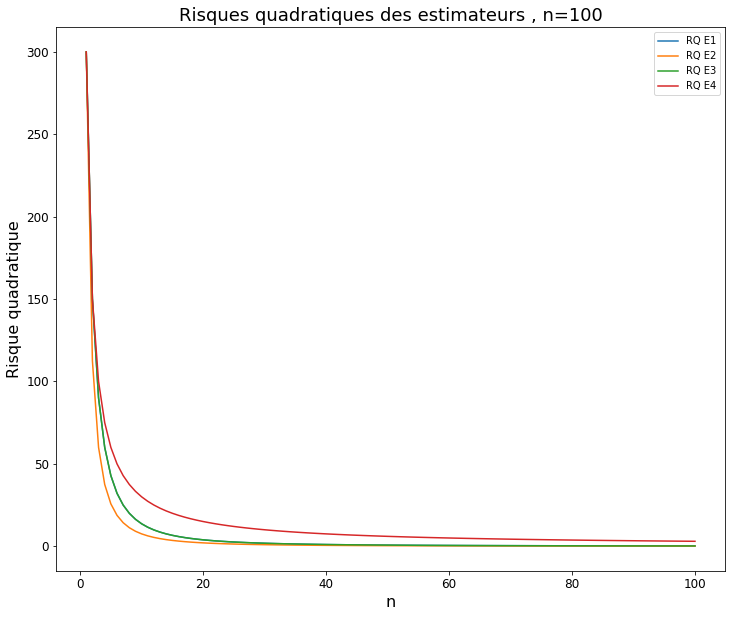

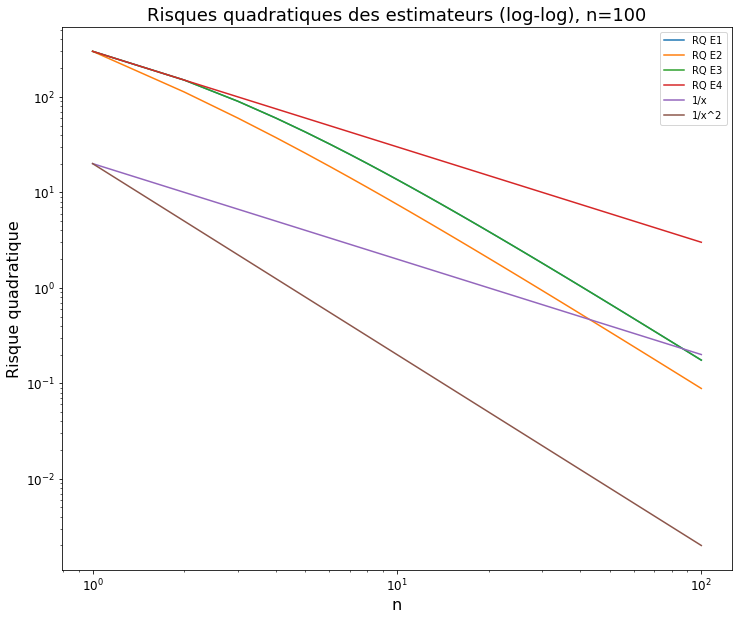

In [33]:
#Parametres 

theta = 30
nMax = 100

TableN = [i for i in range(1,nMax+1)]

TableR1 = []
TableR2 = []
TableR3 = []
TableR4 = []

for n in range(1,nMax+1):
    TableR1.append(R1(n,theta))
    TableR2.append(R2(n,theta))
    TableR3.append(R3(n,theta))
    TableR4.append(R4(n,theta))

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,10)
ax.set_title("Risques quadratiques des estimateurs , n="+str(nMax),fontsize = 18)
plt.ylabel("Risque quadratique",fontsize = 16)
plt.xlabel("n", fontsize = 16)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.plot(TableN,TableR1,label = "RQ E1")
plt.plot(TableN,TableR2,label = "RQ E2")
plt.plot(TableN,TableR3,label = "RQ E3")
plt.plot(TableN,TableR4,label = "RQ E4")

#P1 = [n**(-1) for n in range(1,nMax+1)]
#P2 = [n**(-2) for n in range(1,nMax+1)]

#plt.plot(TableN,P1,label = "1/x")
#plt.plot(TableN,P2,label = "1/x^2")


#ax.set_ylim(29.99, 30.01)
ax.ticklabel_format(useOffset=False)
#ax.set_yscale('log')
#ax.set_xscale('log')

plt.legend()

plt.show()

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,10)
ax.set_title("Risques quadratiques des estimateurs (log-log), n="+str(nMax),fontsize = 18)
plt.ylabel("Risque quadratique",fontsize = 16)
plt.xlabel("n", fontsize = 16)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.plot(TableN,TableR1,label = "RQ E1")
plt.plot(TableN,TableR2,label = "RQ E2")
plt.plot(TableN,TableR3,label = "RQ E3")
plt.plot(TableN,TableR4,label = "RQ E4")

P1 = [20*n**(-1) for n in range(1,nMax+1)]
P2 = [20*n**(-2) for n in range(1,nMax+1)]

plt.plot(TableN,P1,label = "1/x")
plt.plot(TableN,P2,label = "1/x^2")


#ax.set_ylim(29.99, 30.01)
ax.ticklabel_format(useOffset=False)
ax.set_yscale('log')
ax.set_xscale('log')

plt.legend()

plt.show()

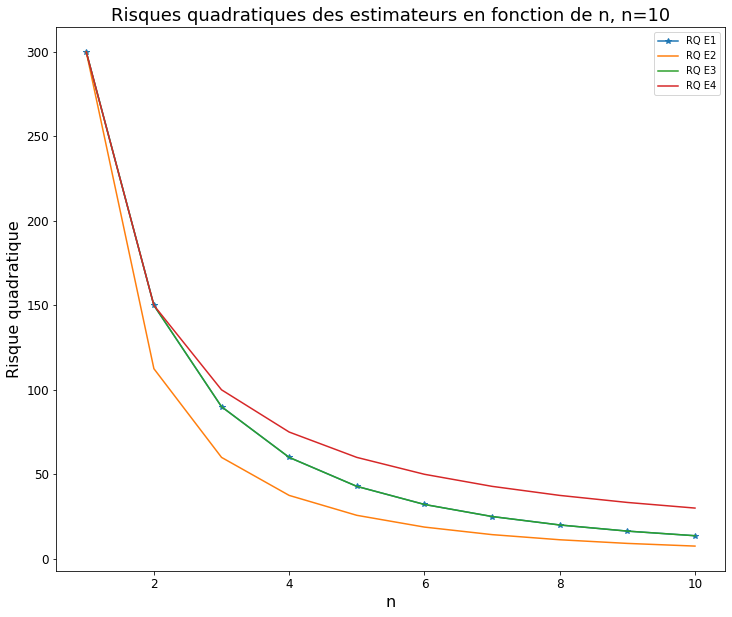

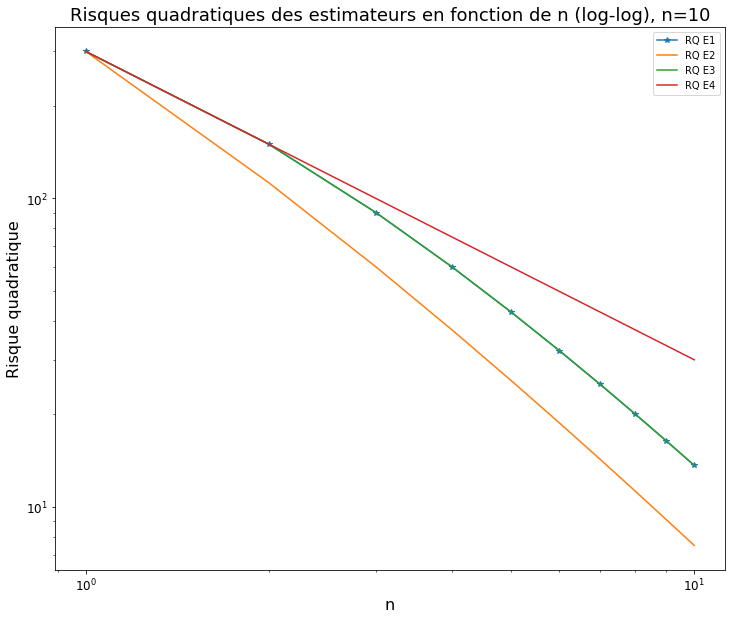

In [34]:
#Parametres 

theta = 30
nMax = 10

TableN = [i for i in range(1,nMax+1)]

TableR1 = []
TableR2 = []
TableR3 = []
TableR4 = []

for n in range(1,nMax+1):
    TableR1.append(R1(n,theta))
    TableR2.append(R2(n,theta))
    TableR3.append(R3(n,theta))
    TableR4.append(R4(n,theta))

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,10)
ax.set_title("Risques quadratiques des estimateurs en fonction de n, n="+str(nMax), fontsize = 18)

plt.plot(TableN,TableR1,label = "RQ E1", marker = "*")
plt.plot(TableN,TableR2,label = "RQ E2")
plt.plot(TableN,TableR3,label = "RQ E3")
plt.plot(TableN,TableR4,label = "RQ E4")

plt.ylabel("Risque quadratique",fontsize = 16)
plt.xlabel("n", fontsize = 16)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

#P1 = [30*n**(-1) for n in range(1,nMax+1)]
#P2 = [30*n**(-2) for n in range(1,nMax+1)]

#plt.plot(TableN,P1,label = "1/x")
#plt.plot(TableN,P2,label = "1/x^2")


#ax.set_ylim(29.99, 30.01)
ax.ticklabel_format(useOffset=False)
#ax.set_yscale('log')
#ax.set_xscale('log')

plt.legend()

plt.show()

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,10)
ax.set_title("Risques quadratiques des estimateurs en fonction de n (log-log), n="+str(nMax), fontsize = 18)

plt.plot(TableN,TableR1,label = "RQ E1", marker = "*")
plt.plot(TableN,TableR2,label = "RQ E2")
plt.plot(TableN,TableR3,label = "RQ E3")
plt.plot(TableN,TableR4,label = "RQ E4")

plt.ylabel("Risque quadratique",fontsize = 16)
plt.xlabel("n", fontsize = 16)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

#P1 = [30*n**(-1) for n in range(1,nMax+1)]
#P2 = [30*n**(-2) for n in range(1,nMax+1)]

#plt.plot(TableN,P1,label = "1/x")
#plt.plot(TableN,P2,label = "1/x^2")


#ax.set_ylim(29.99, 30.01)
ax.ticklabel_format(useOffset=False)
ax.set_yscale('log')
ax.set_xscale('log')

plt.legend()

plt.show()

#### Commentaires finaux

Pour le tracée de $n=100$ on voit bien que toutes les courbes convergent, et, si on trace aussi une log-log avec $x^{-1}$ et $x^{-2}$ on retrouve les pentes attendues theoriquement.

Pour la courbe avec $n=10$ on retrouve bien que notre estimateur $2$ est toujours plus petit que les autres même pour $n$ petit, sauf $n=1$ où ils sont tous égaux.

On remarque aussi que pour les deux courbes des erreurs des estimateurs $1$ et $3$ (et dans toutes après dont les deux estimateurs apparaient) sont superposés, ce qui est attendu car ils sont égaux.

### Exercice T15

$$
R(\theta,\hat{\theta}\alpha)=Var(\hat{\theta}_{\alpha})+(\theta-\mathbb{E}(\hat{\theta}_\alpha))^2
$$

Avec

$$
\mathbb{E}(\hat{\theta}_\alpha)=\alpha\mathbb{E}(X{(n)})=\alpha\theta\frac{n}{n+1}
$$

Et, comme déjà développé dans l'exercice T12 pour Var$(X_{(n)})$ :

$$
Var(\hat{\theta}_{\alpha})=\mathbb{E}(\hat{\theta}_{\alpha}^2)-\mathbb{E}(\hat{\theta}_{\alpha})^2=\alpha^2 Var(X{(n)})=\alpha^2\theta^2\Bigg(\frac{n}{n+2}-\Big(\frac{n}{n+1}\Big)^2\Bigg)
$$

Dès lors:

$$
R(\theta,\hat{\theta}_{\alpha})=\alpha^2\theta^2\Bigg(\frac{n}{n+2}-\Big(\frac{n}{n+1}\Big)^2\Bigg)+(\theta-\alpha\mathbb{E}(X_{(n)})^{2}
$$

$$
R(\theta,\hat{\theta}_{\alpha})=\alpha^2\theta^2\Bigg(\frac{n}{n+2}-\Big(\frac{n}{n+1}\Big)^2\Bigg)+\Big(\theta-\alpha\theta\frac{n}{n+1}\Big)^{2}
$$

Ce qui nous donne :

$$
\boxed{R(\theta,\hat{\theta}_{\alpha})=\theta^2-2\theta^2\alpha\frac{n}{n+1}+\alpha^2\theta^2\frac{n}{n+2}}
$$

### Exercice S10

Écrivons l'estimateur :

In [35]:
#Estimateur alpha

def EstThetaAlpha(alpha,n,theta):
    return alpha*EstTheta1(n,theta)

Si nous cherchons le tracée de lar courbe pour un tirage fixe :

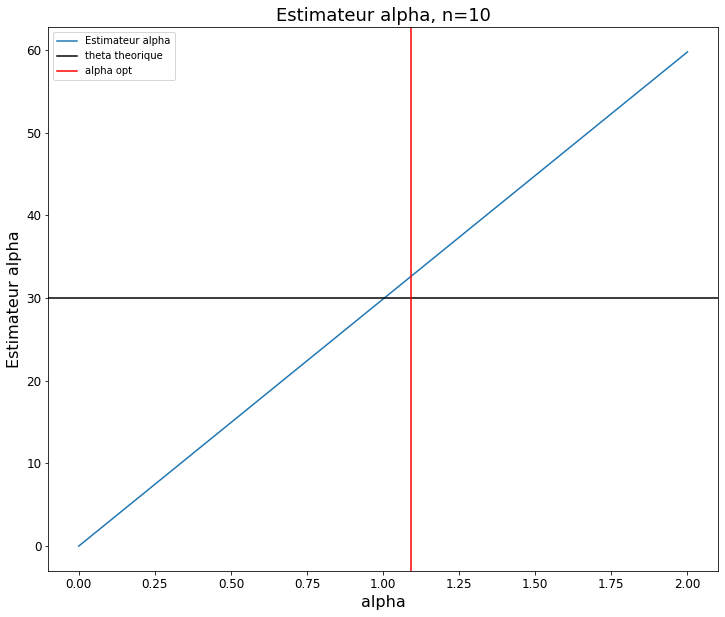

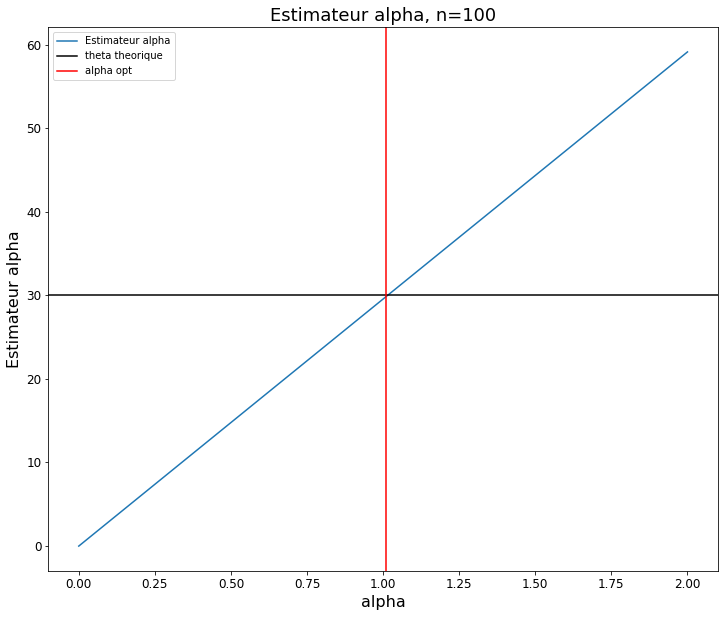

In [36]:
theta = 30
TableN = [10,100]

TableAlpha = np.linspace(0,2,100)

for n in TableN:

    TableEstAlpha = EstThetaAlpha(TableAlpha,n,theta)

    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(12,10)
    
    plt.plot(TableAlpha,TableEstAlpha,label = "Estimateur alpha")
    plt.ylabel("Estimateur alpha",fontsize = 16)
    plt.xlabel("alpha", fontsize = 16)
    ax.set_title("Estimateur alpha, n="+str(n),fontsize = 18)
    
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)


    #ax.set_ylim(29.99, 30.01)
    ax.ticklabel_format(useOffset=False)
    
    plt.axhline(30, color = "black", label = "theta theorique")
    plt.axvline((n+2)/(n+1), color = "red", label = "alpha opt")


    plt.legend()

    plt.show()


#### Commentaires finaux :
On remarque que notre curbe est une ligne drote, cela était attendu car $\hat\theta_{\alpha} = \alpha X_{(n)}$. Une fois fait le tirage, faire varier $\alpha$ fera juste une ligne droite.

On remarque aussi, si on nous permets d'utiliser le résultat de la question suivante, on remarque aussi que l'estimateur de minimum d'erreur quadratique donne bien la valeur de $\theta$ lorsque $n$ croit.

On pouvait aussi s'intéresser à faire le tracage de la courbe quand on varie les tirages. On remarque aussi que notre $\alpha_{opt}$ donne aussi un bon estimateur lorsque $n$ croit.

Si nous cherchons un nouveau tirage pour chaque $\alpha$ :

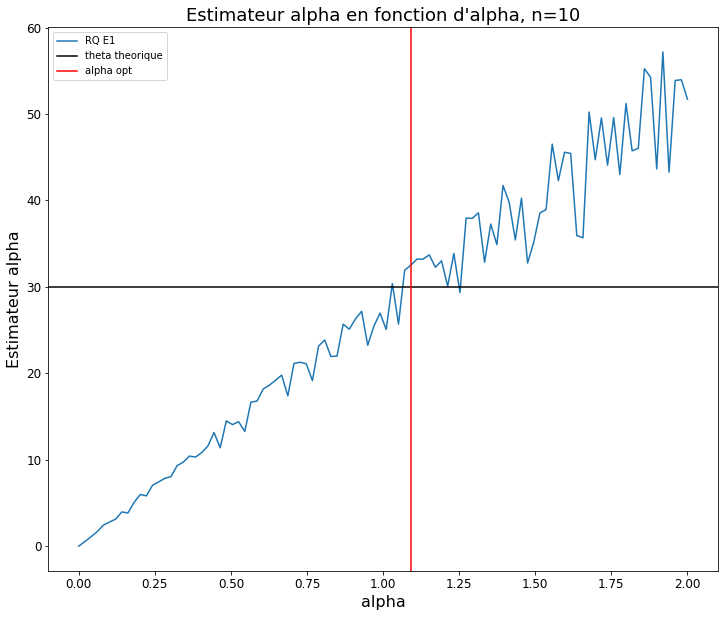

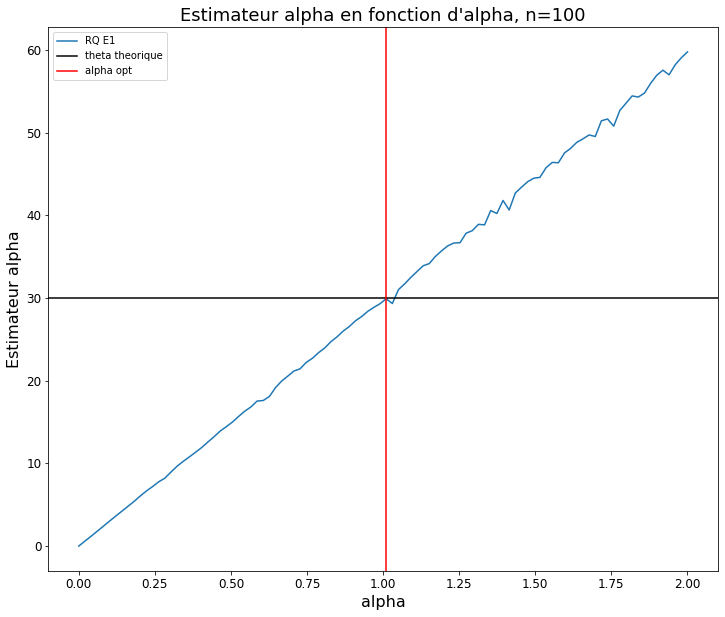

In [37]:
theta = 30
TableN = [10,100]

TableAlpha = np.linspace(0,2,100)

for n in TableN:

    TableEstAlpha=[]
    for alpha in TableAlpha:
        TableEstAlpha.append(EstThetaAlpha(alpha,n,theta))

    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(12,10)
    
    
    plt.plot(TableAlpha,TableEstAlpha,label = "RQ E1")
    ax.set_title("Estimateur alpha en fonction d'alpha, n="+str(n),fontsize = "18")
    
    plt.ylabel("Estimateur alpha", fontsize = "16")
    plt.xlabel("alpha",fontsize = "16")
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)
    
    plt.axhline(30, color = "black", label = "theta theorique")
    plt.axvline((n+2)/(n+1), color = "red", label = "alpha opt")


    #ax.set_ylim(29.99, 30.01)
    ax.ticklabel_format(useOffset=False)


    plt.legend()

    plt.show()


Les commentaires pour ces courbes additionnelles ont été faits deux cellules avant dans les commentaires finaux.

### Exercice T16

$R(\theta,\hat{\theta}_\alpha)$ est un polynôme du second degré en $\alpha$ avec coefficient dominant positif, son point de minimum absolue est donc le point d'annulation de sa dérivée. On trouve alors : 

$$
R(\theta,\hat{\theta}_\alpha)'=-2\theta^2\frac{n}{n+1}+2\alpha\theta^2\frac{n}{n+2}
$$

Donc :

$$
R(\theta,\hat{\theta}_\alpha)'=0\Rightarrow \alpha=\frac{n}{n+1} \times \frac{n+2}{n}=\frac{n+2}{n+1}
$$ 

On conclut donc que :

$$
\boxed{\alpha_{opt} = \frac{n+2}{n+1}}
$$

Calculons maintenant l'erreur quadratique en remplaçant $\alpha_{opt}$ dans l'expression de l'erreur quadratique trouvé en T15 :

$$
R(\theta,\hat{\theta}_{\alpha_{ opt}})=\theta^2-2\theta^2\frac{n+2}{n+1}\frac{n}{n+1}+\Big(\frac{n+2}{n+1}\Big)^2\theta^2\frac{n}{n+2}=\theta^2-\theta^2\frac{n+2}{n+1}\frac{n}{n+1}=\frac{\theta^2}{(n+1)^2}
$$

$$
R(\theta,\hat{\theta}_{\alpha_{ opt}})=\theta^2-\theta^2\frac{n+2}{n+1}\frac{n}{n+1}=\frac{\theta^2}{(n+1)^2}
$$

$$
\boxed{R(\theta,\hat{\theta}_{\alpha_{ opt}})=\frac{\theta^2}{(n+1)^2}}
$$

### Exercice S11

In [38]:
def Ralpha(n,theta):
    return (theta**2)/((n+1)**2)

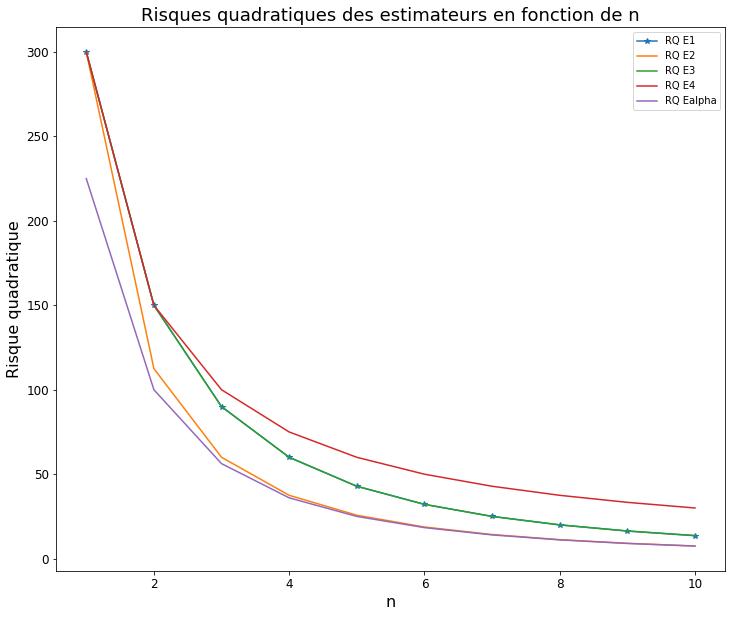

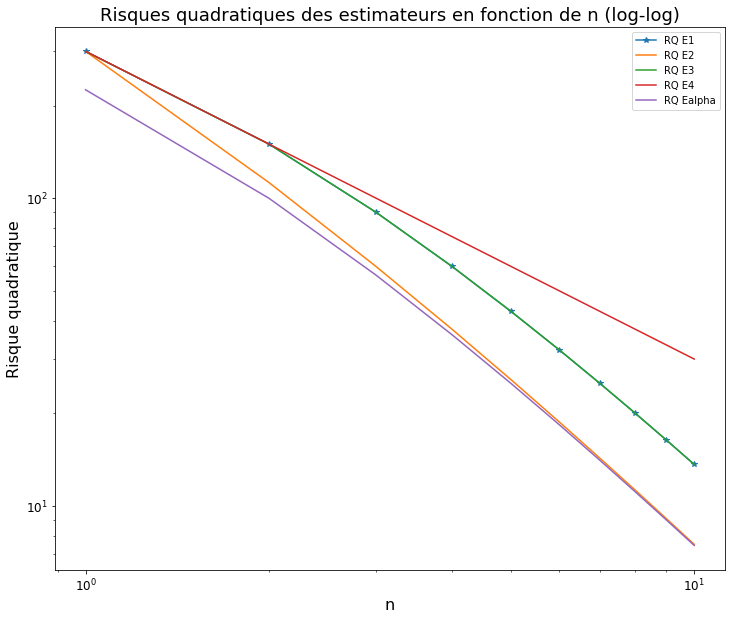

In [39]:
#Parametres 

theta = 30
nMax = 10

TableN = [i for i in range(1,nMax+1)]

TableR1 = []
TableR2 = []
TableR3 = []
TableR4 = []
TableR5 = []

for n in range(1,nMax+1):
    TableR1.append(R1(n,theta))
    TableR2.append(R2(n,theta))
    TableR3.append(R3(n,theta))
    TableR4.append(R4(n,theta))
    TableR5.append(Ralpha(n,theta))

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,10)
ax.set_title("Risques quadratiques des estimateurs en fonction de n", fontsize = "18")

plt.plot(TableN,TableR1,label = "RQ E1", marker = "*")
plt.plot(TableN,TableR2,label = "RQ E2")
plt.plot(TableN,TableR3,label = "RQ E3")
plt.plot(TableN,TableR4,label = "RQ E4")
plt.plot(TableN,TableR5,label = "RQ Ealpha")

plt.ylabel("Risque quadratique", fontsize = "16")
plt.xlabel("n",fontsize = "16")
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

#P1 = [n**(-1) for n in range(1,nMax+1)]
#P2 = [n**(-2) for n in range(1,nMax+1)]

#plt.plot(TableN,P1,label = "1/x")
#plt.plot(TableN,P2,label = "1/x^2")


#ax.set_ylim(29.99, 30.01)
ax.ticklabel_format(useOffset=False)
#ax.set_yscale('log')
#ax.set_xscale('log')

plt.legend()

plt.show()

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,10)
ax.set_title("Risques quadratiques des estimateurs en fonction de n (log-log)", fontsize = "18")

plt.plot(TableN,TableR1,label = "RQ E1", marker = "*")
plt.plot(TableN,TableR2,label = "RQ E2")
plt.plot(TableN,TableR3,label = "RQ E3")
plt.plot(TableN,TableR4,label = "RQ E4")
plt.plot(TableN,TableR5,label = "RQ Ealpha")

plt.ylabel("Risque quadratique", fontsize = "16")

plt.xlabel("n",fontsize = "16")


plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

#P1 = [n**(-1) for n in range(1,nMax+1)]
#P2 = [n**(-2) for n in range(1,nMax+1)]

#plt.plot(TableN,P1,label = "1/x")
#plt.plot(TableN,P2,label = "1/x^2")


#ax.set_ylim(29.99, 30.01)
ax.ticklabel_format(useOffset=False)
ax.set_yscale('log')
ax.set_xscale('log')

plt.legend()

plt.show()

On observe que effectivement son erreur est plus petit dès le début quand on le compare avec notre ancien meilleur estimateur (Estimateur $2$), et quand $n$ croit on remarque que les deux semblent convergir l'un à l'autre.

Le meilleur estimateur des 4 premiers était l'estimateur 2, trançons donc les courbes :

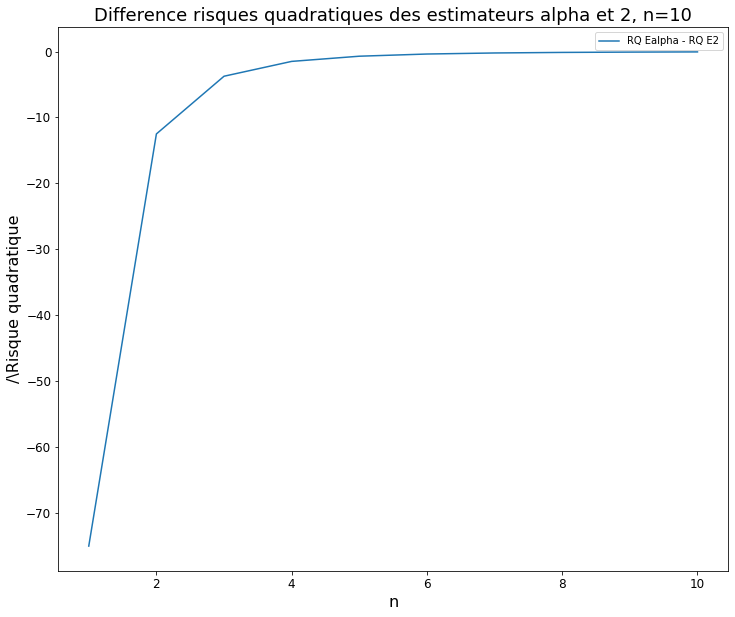

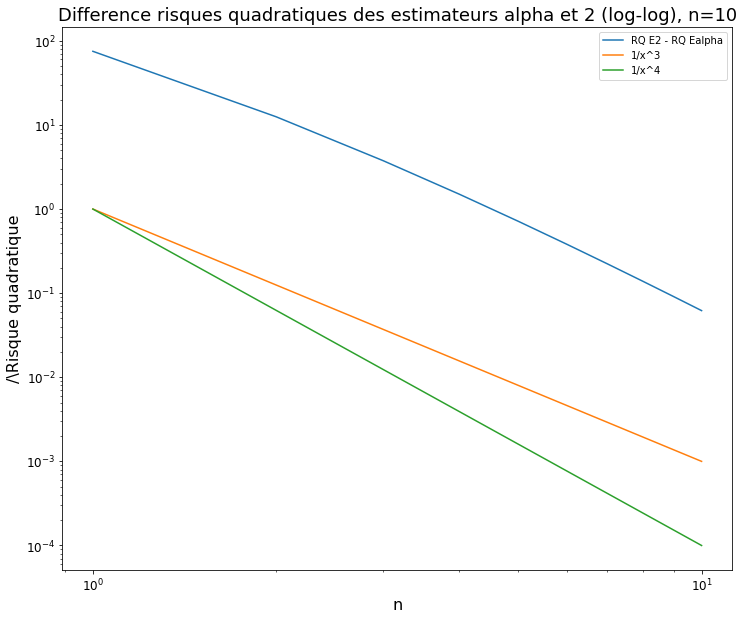

In [40]:
#Parametres 

theta = 30
nMax = 10

TableN = [i for i in range(1,nMax+1)]

TableR2 = []
TableR5 = []

for n in range(1,nMax+1):
    TableR2.append(R2(n,theta))
    TableR5.append(Ralpha(n,theta))
    
TableF = np.array(TableR5)-np.array(TableR2)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,10)
ax.set_title("Difference risques quadratiques des estimateurs alpha et 2, n="+str(nMax),fontsize = 18)

plt.plot(TableN,TableF,label = "RQ Ealpha - RQ E2")

plt.ylabel("/\Risque quadratique", fontsize = "16")
plt.yticks(fontsize = 12)
plt.xlabel("n",fontsize = "16")
plt.xticks(fontsize = 12)

#P1 = [n**(-1) for n in range(1,nMax+1)]
#P2 = [n**(-2) for n in range(1,nMax+1)]
P3 = [n**(-3) for n in range(1,nMax+1)]
P4 = [n**(-4) for n in range(1,nMax+1)]

#plt.plot(TableN,P1,label = "1/x")
#plt.plot(TableN,P2,label = "1/x^2")


#ax.set_ylim(29.99, 30.01)
ax.ticklabel_format(useOffset=False)
#ax.set_yscale('log')
#ax.set_xscale('log')

plt.legend()

plt.show()

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,10)
ax.set_title("Difference risques quadratiques des estimateurs alpha et 2 (log-log), n="+str(nMax),fontsize = 18)

plt.plot(TableN,-TableF,label = "RQ E2 - RQ Ealpha")

plt.ylabel("/\Risque quadratique", fontsize = "16")
plt.yticks(fontsize = 12)
plt.xlabel("n",fontsize = "16")
plt.xticks(fontsize = 12)

#P1 = [n**(-1) for n in range(1,nMax+1)]
#P2 = [n**(-2) for n in range(1,nMax+1)]

#plt.plot(TableN,P1,label = "1/x")
#plt.plot(TableN,P2,label = "1/x^2")
plt.plot(TableN,P3,label = "1/x^3")
plt.plot(TableN,P4,label = "1/x^4")


#ax.set_ylim(29.99, 30.01)
ax.ticklabel_format(useOffset=False)
ax.set_yscale('log')
ax.set_xscale('log')

plt.legend()

plt.show()

#### Commentaires finaux

Quand on trace la courbe des la différence entre les erreurs des deux estimateurs on remarque qu'effectivement l'erreur quadratique de l'estimateur 2 est toujours plus grand que l'erreur quadratique de l'estimateur $\hat\theta_{\alpha_\text{opt}}$. 

Quand on trace le valeur absolue de leur difference dans une échelle log-log on remarque que cette difference décroit avec $x^{-4}$. Cela était attendu car :

$$
R(\theta,\hat\theta_{2}) -  R(\theta,\hat\theta_{\alpha_{\text{opt}}}) = \theta^{2} \Big( \frac{1}{n(n+2)} - \frac{1}{(n+1)^2}   \Big)
$$

$$
R(\theta,\hat\theta_{2}) -  R(\theta,\hat\theta_{\alpha_{\text{opt}}}) = \theta^{2}  \frac{1}{n(n+2)(n+1)^{2}} (n^{2}+2n+1-n^{2}-2n)
$$

$$
R(\theta,\hat\theta_{2}) -  R(\theta,\hat\theta_{\alpha_{\text{opt}}}) = \theta^{2}  \frac{1}{n(n+2)(n+1)^{2}} 
$$

En plus, et plus important, on remarque que cet estimateur domine l'estimateur 2, et donc tous les autres, faisant d'eux des estimateurs non admissibles. Cela veut aussi dire, donc, que $\hat\theta_{\alpha_{\text{opt}}}$ est un estimateur admissible parmis les $5$ estimateurs étudiés dans ce projet.